In [1]:
%run functions.ipynb

Ready: 2023-05-06 12:12:23


In [29]:
findspark.init()
from pyspark.sql import SparkSession
try:
    spark.stop()
except:
    pass
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark')\
        .getOrCreate()
spark

In [7]:
dates = [r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_city.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics.xlsx",
r"C:\Users\Mamed\_Notebooks\2GIS_2023\files\ten_city\df_dates_rubrics_city.xlsx"]

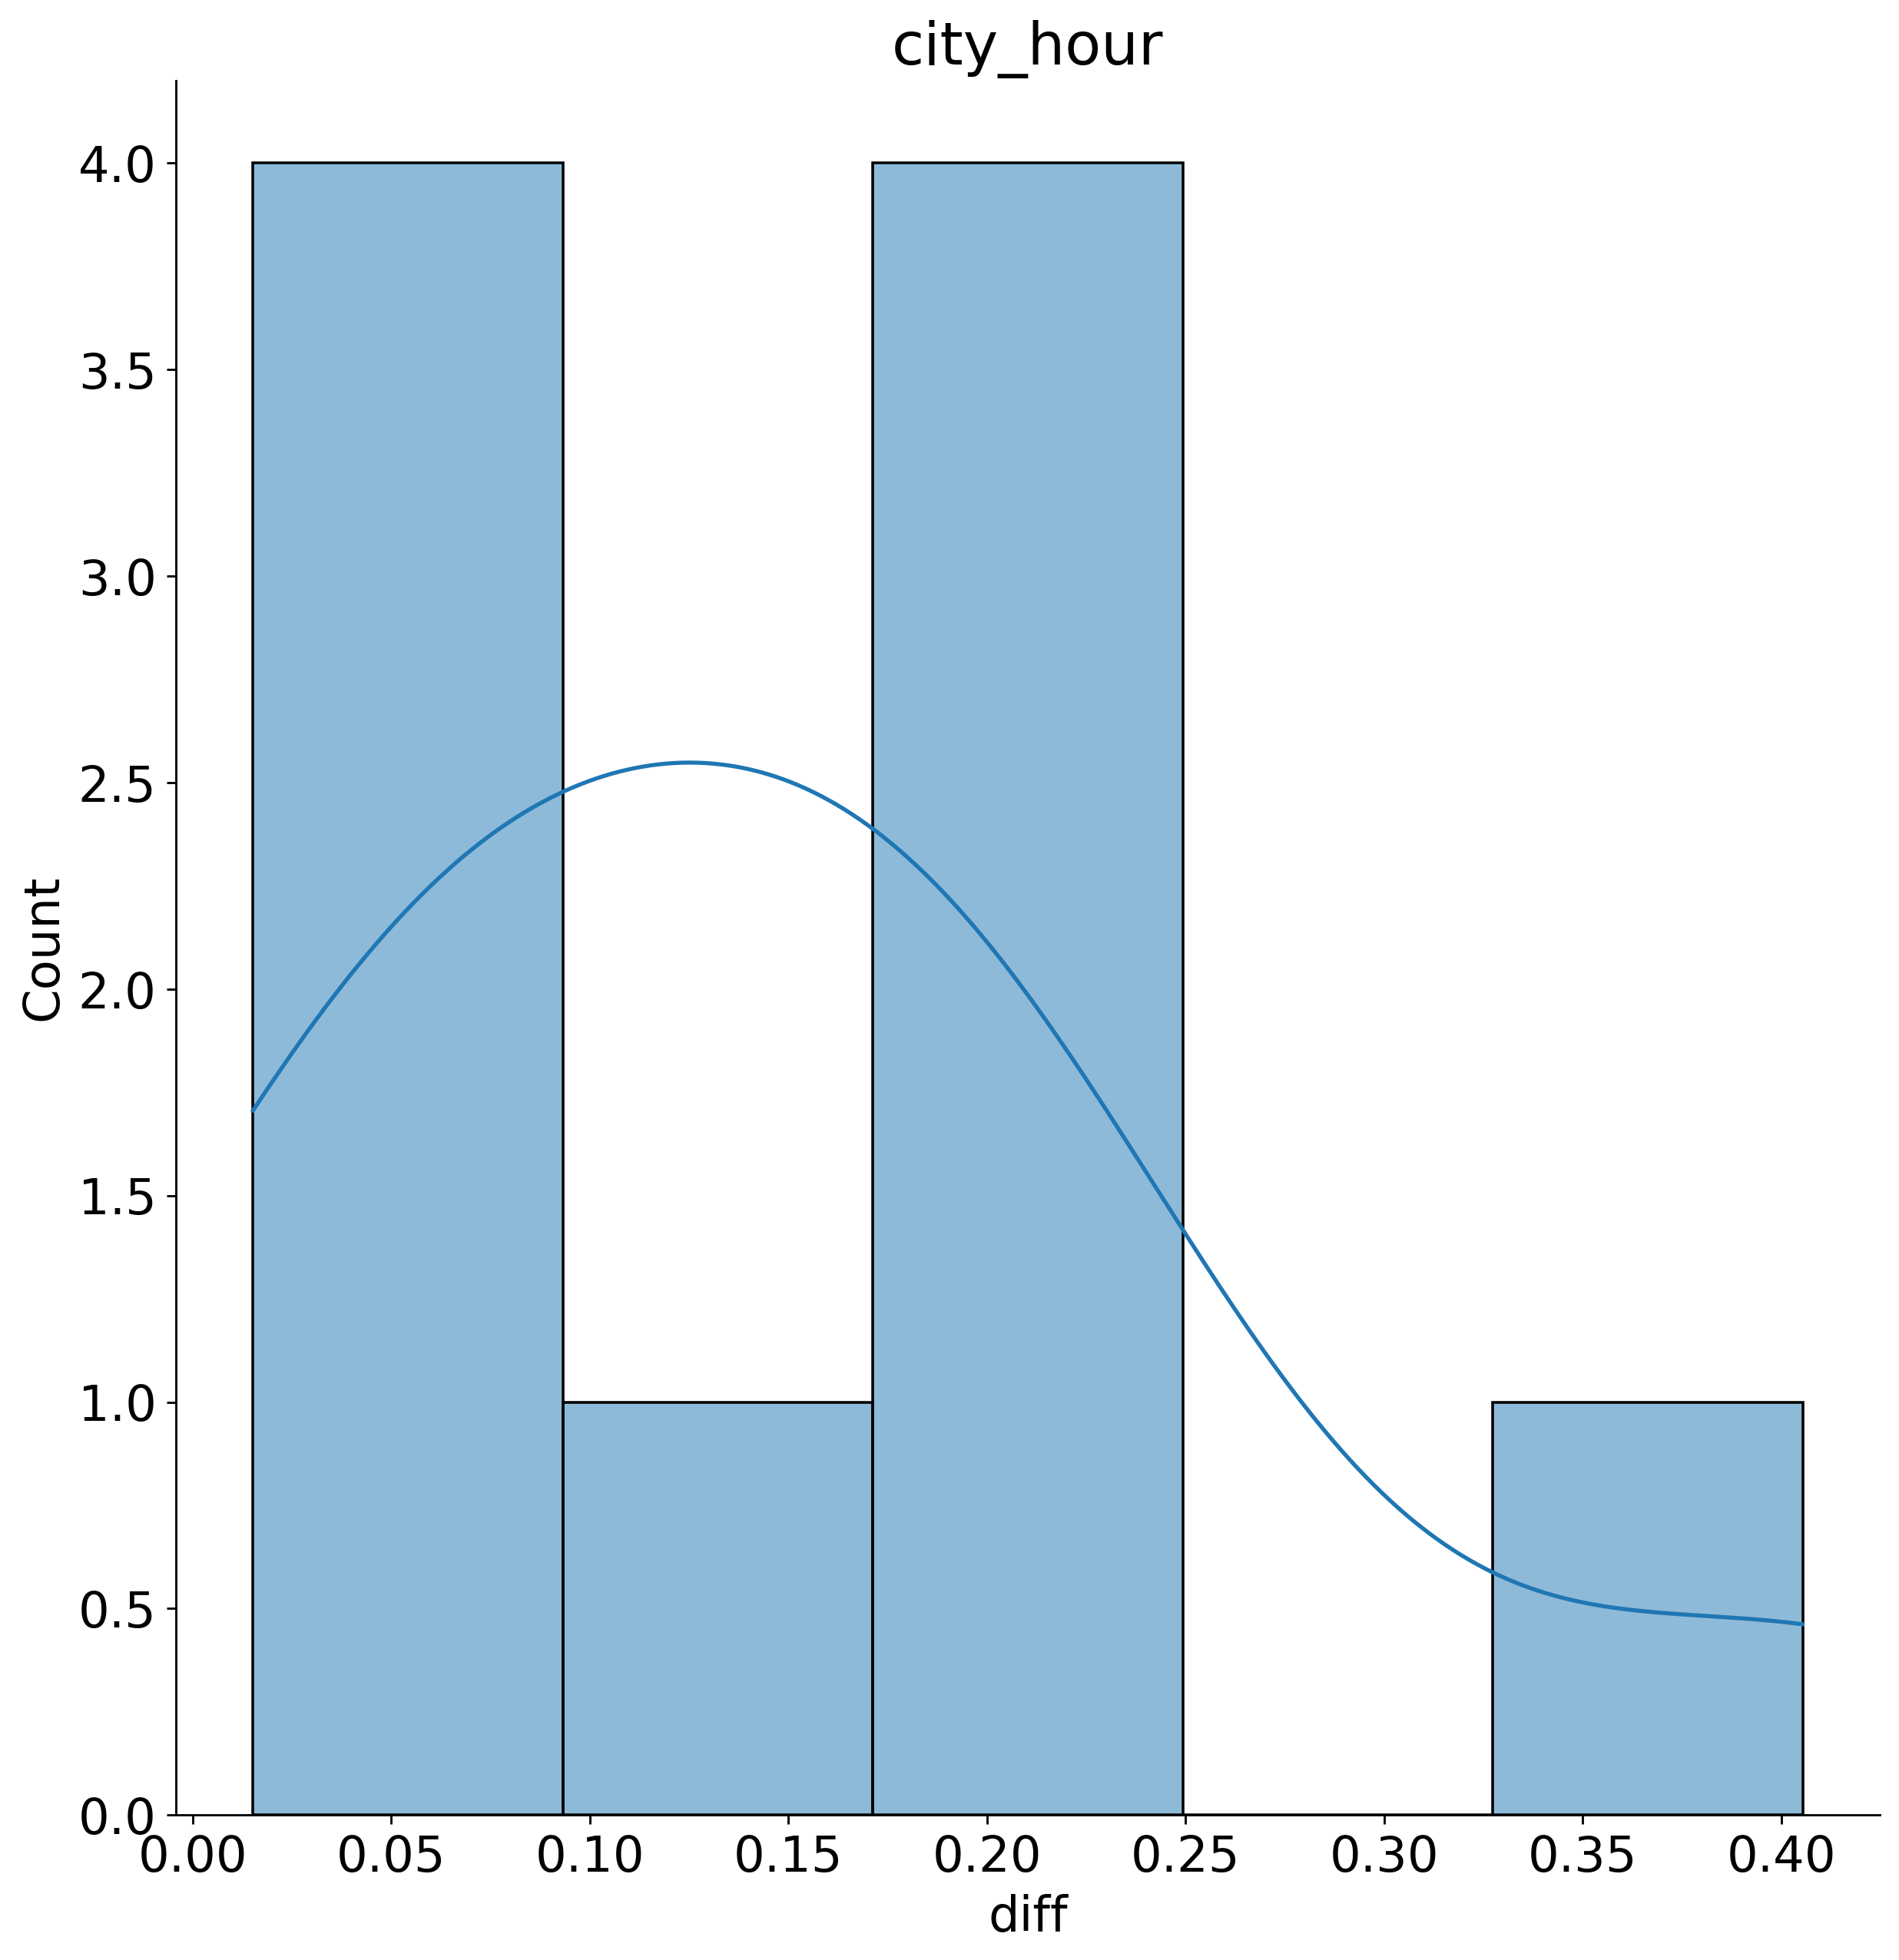

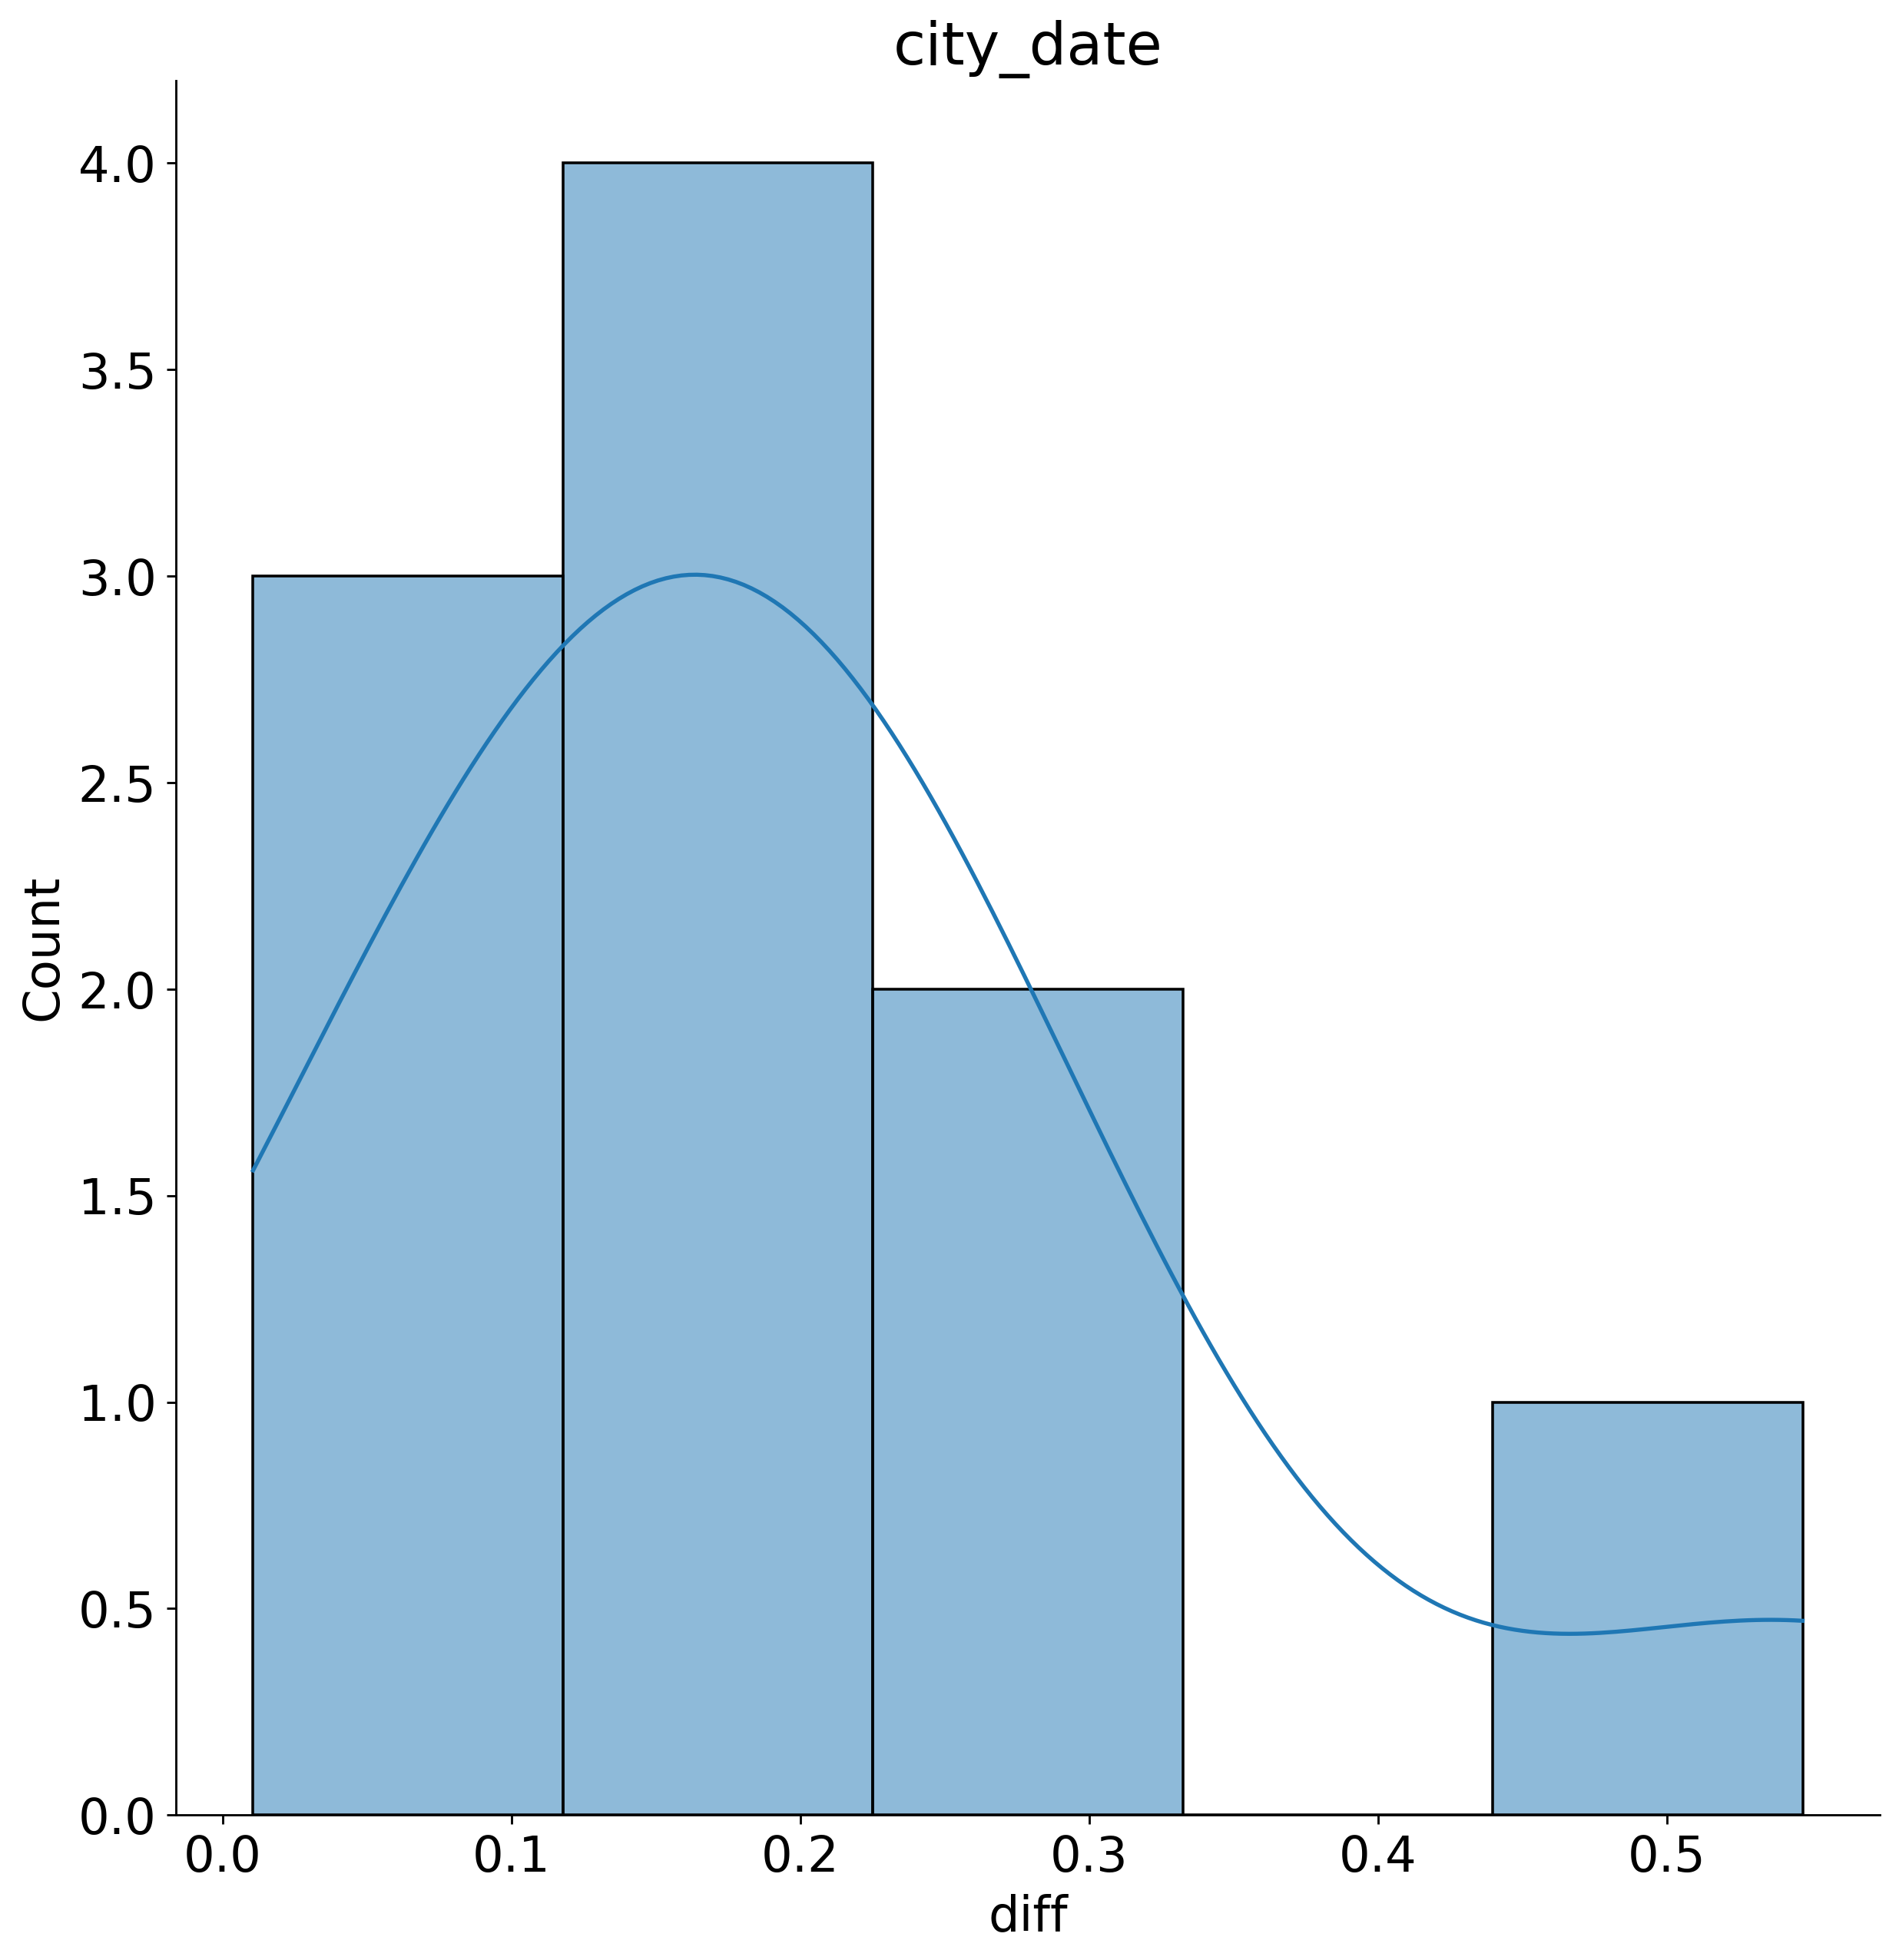

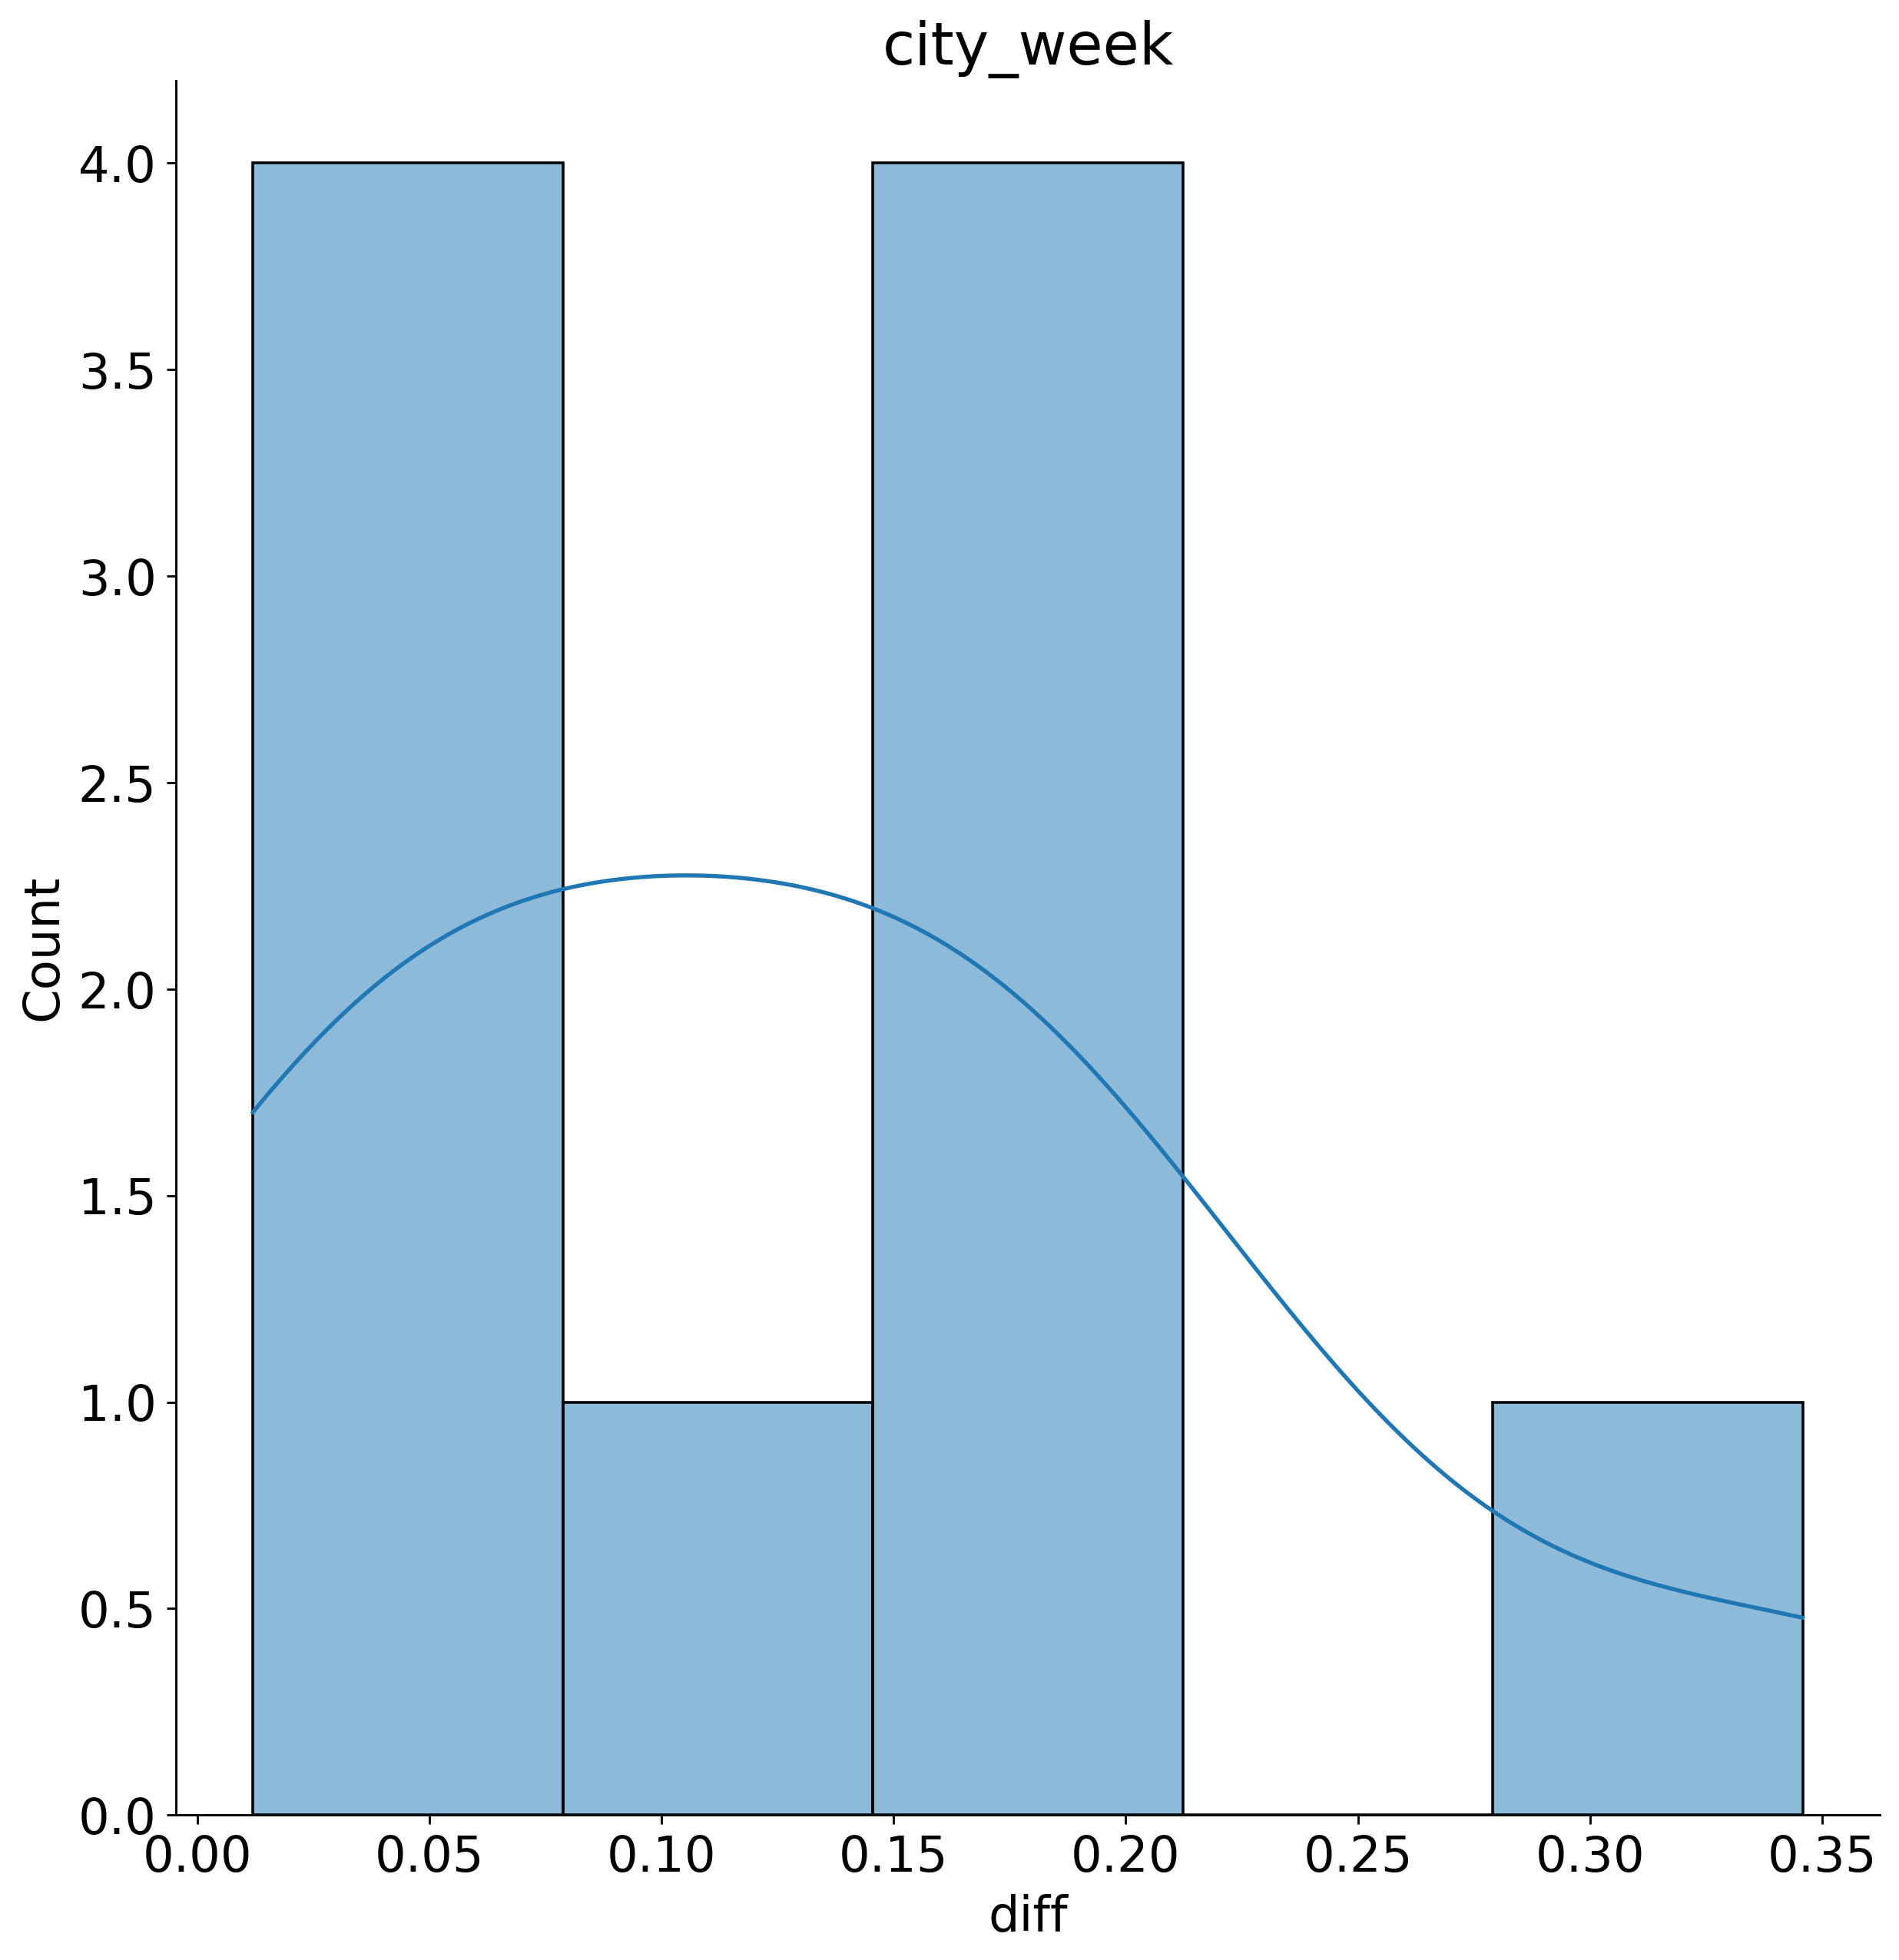

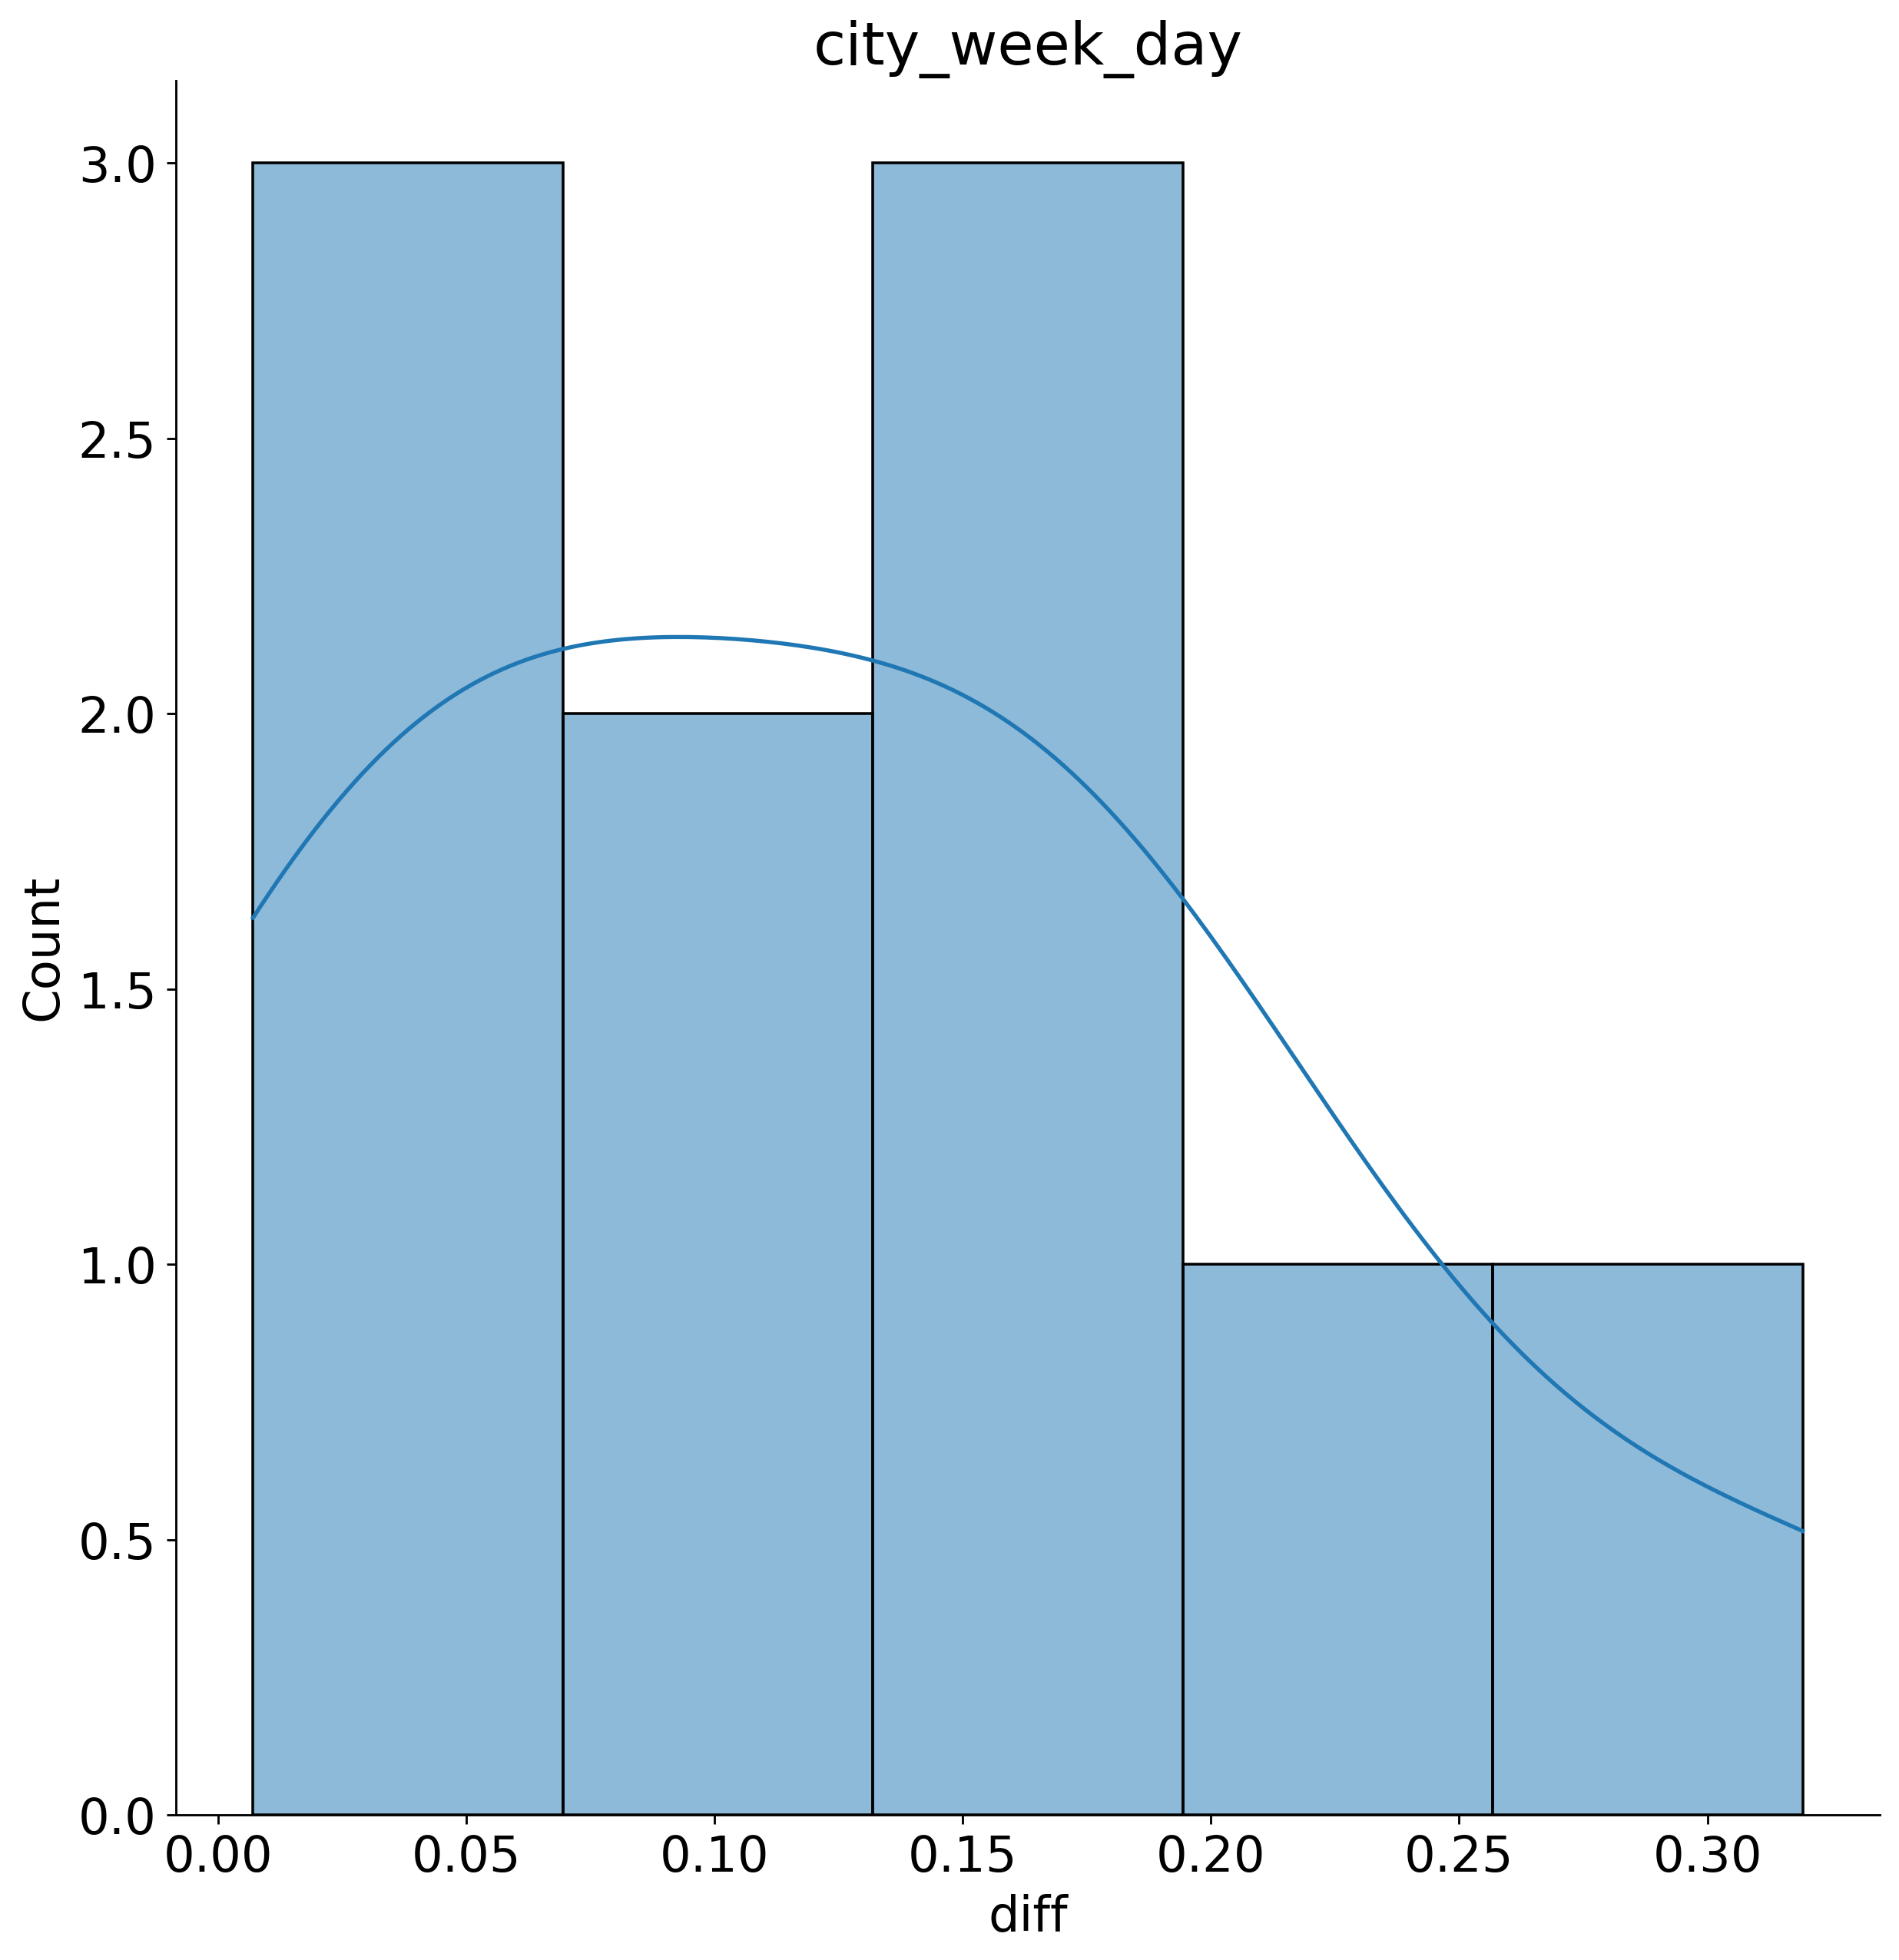

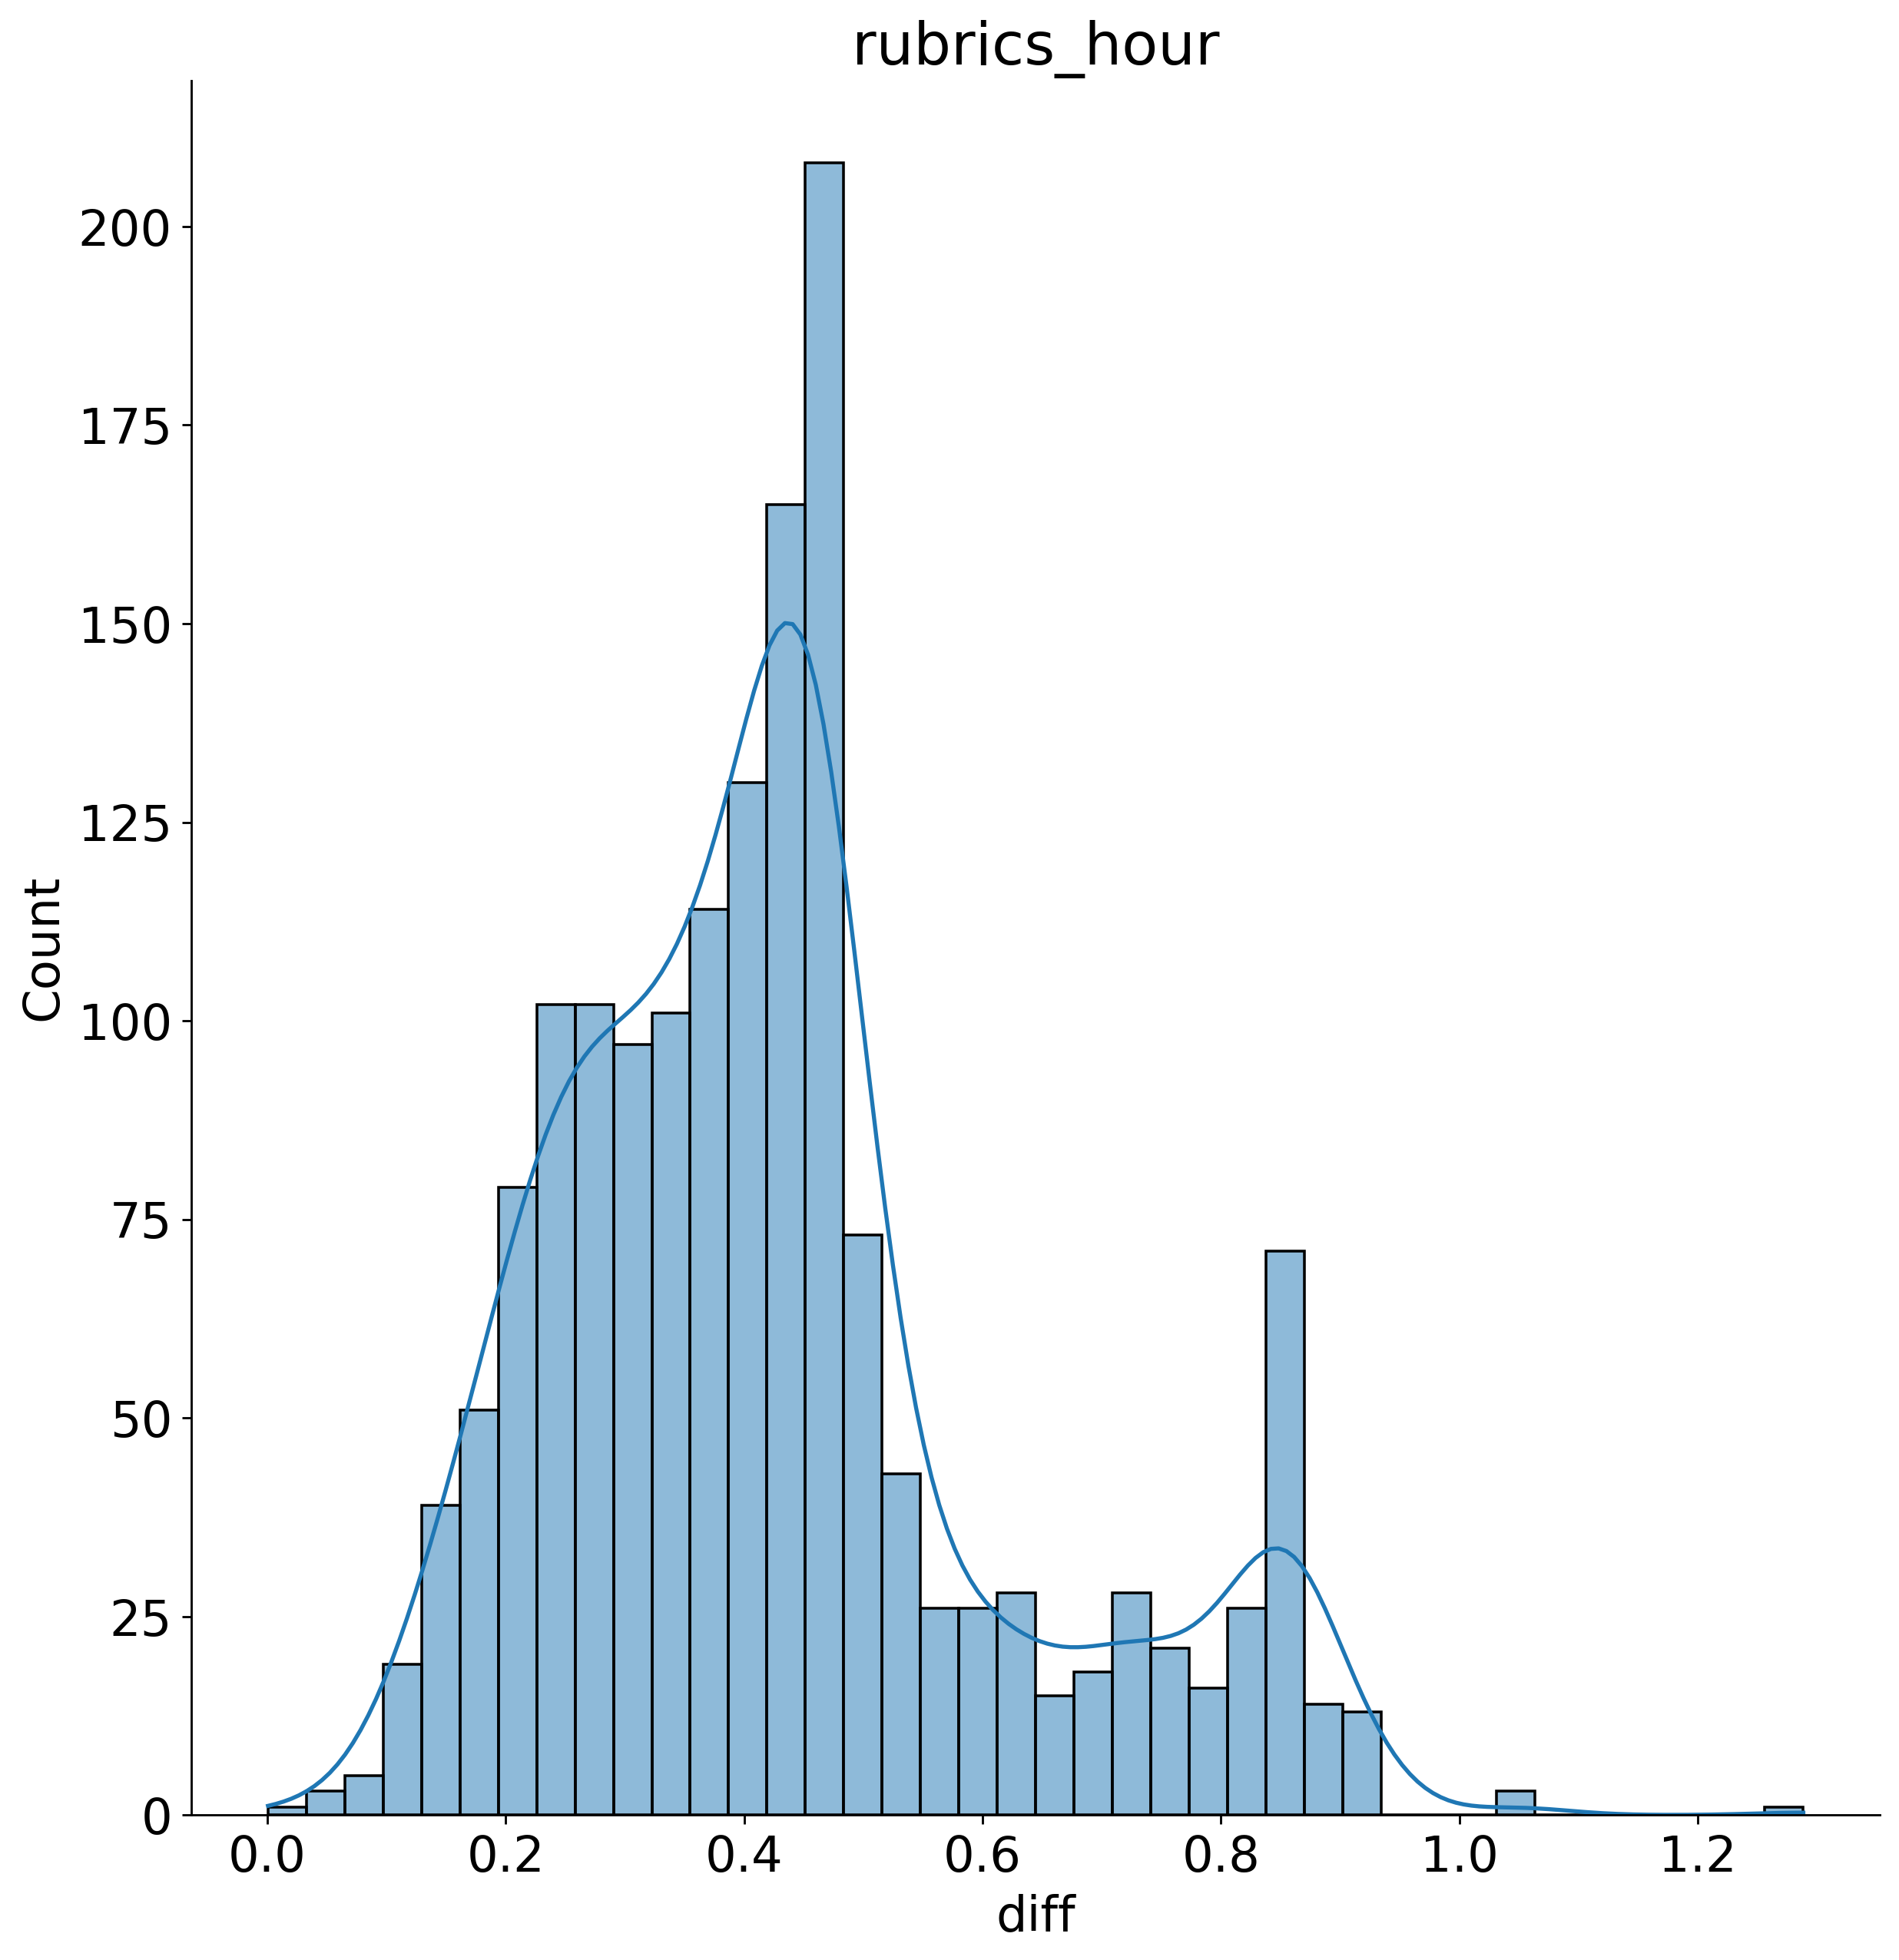

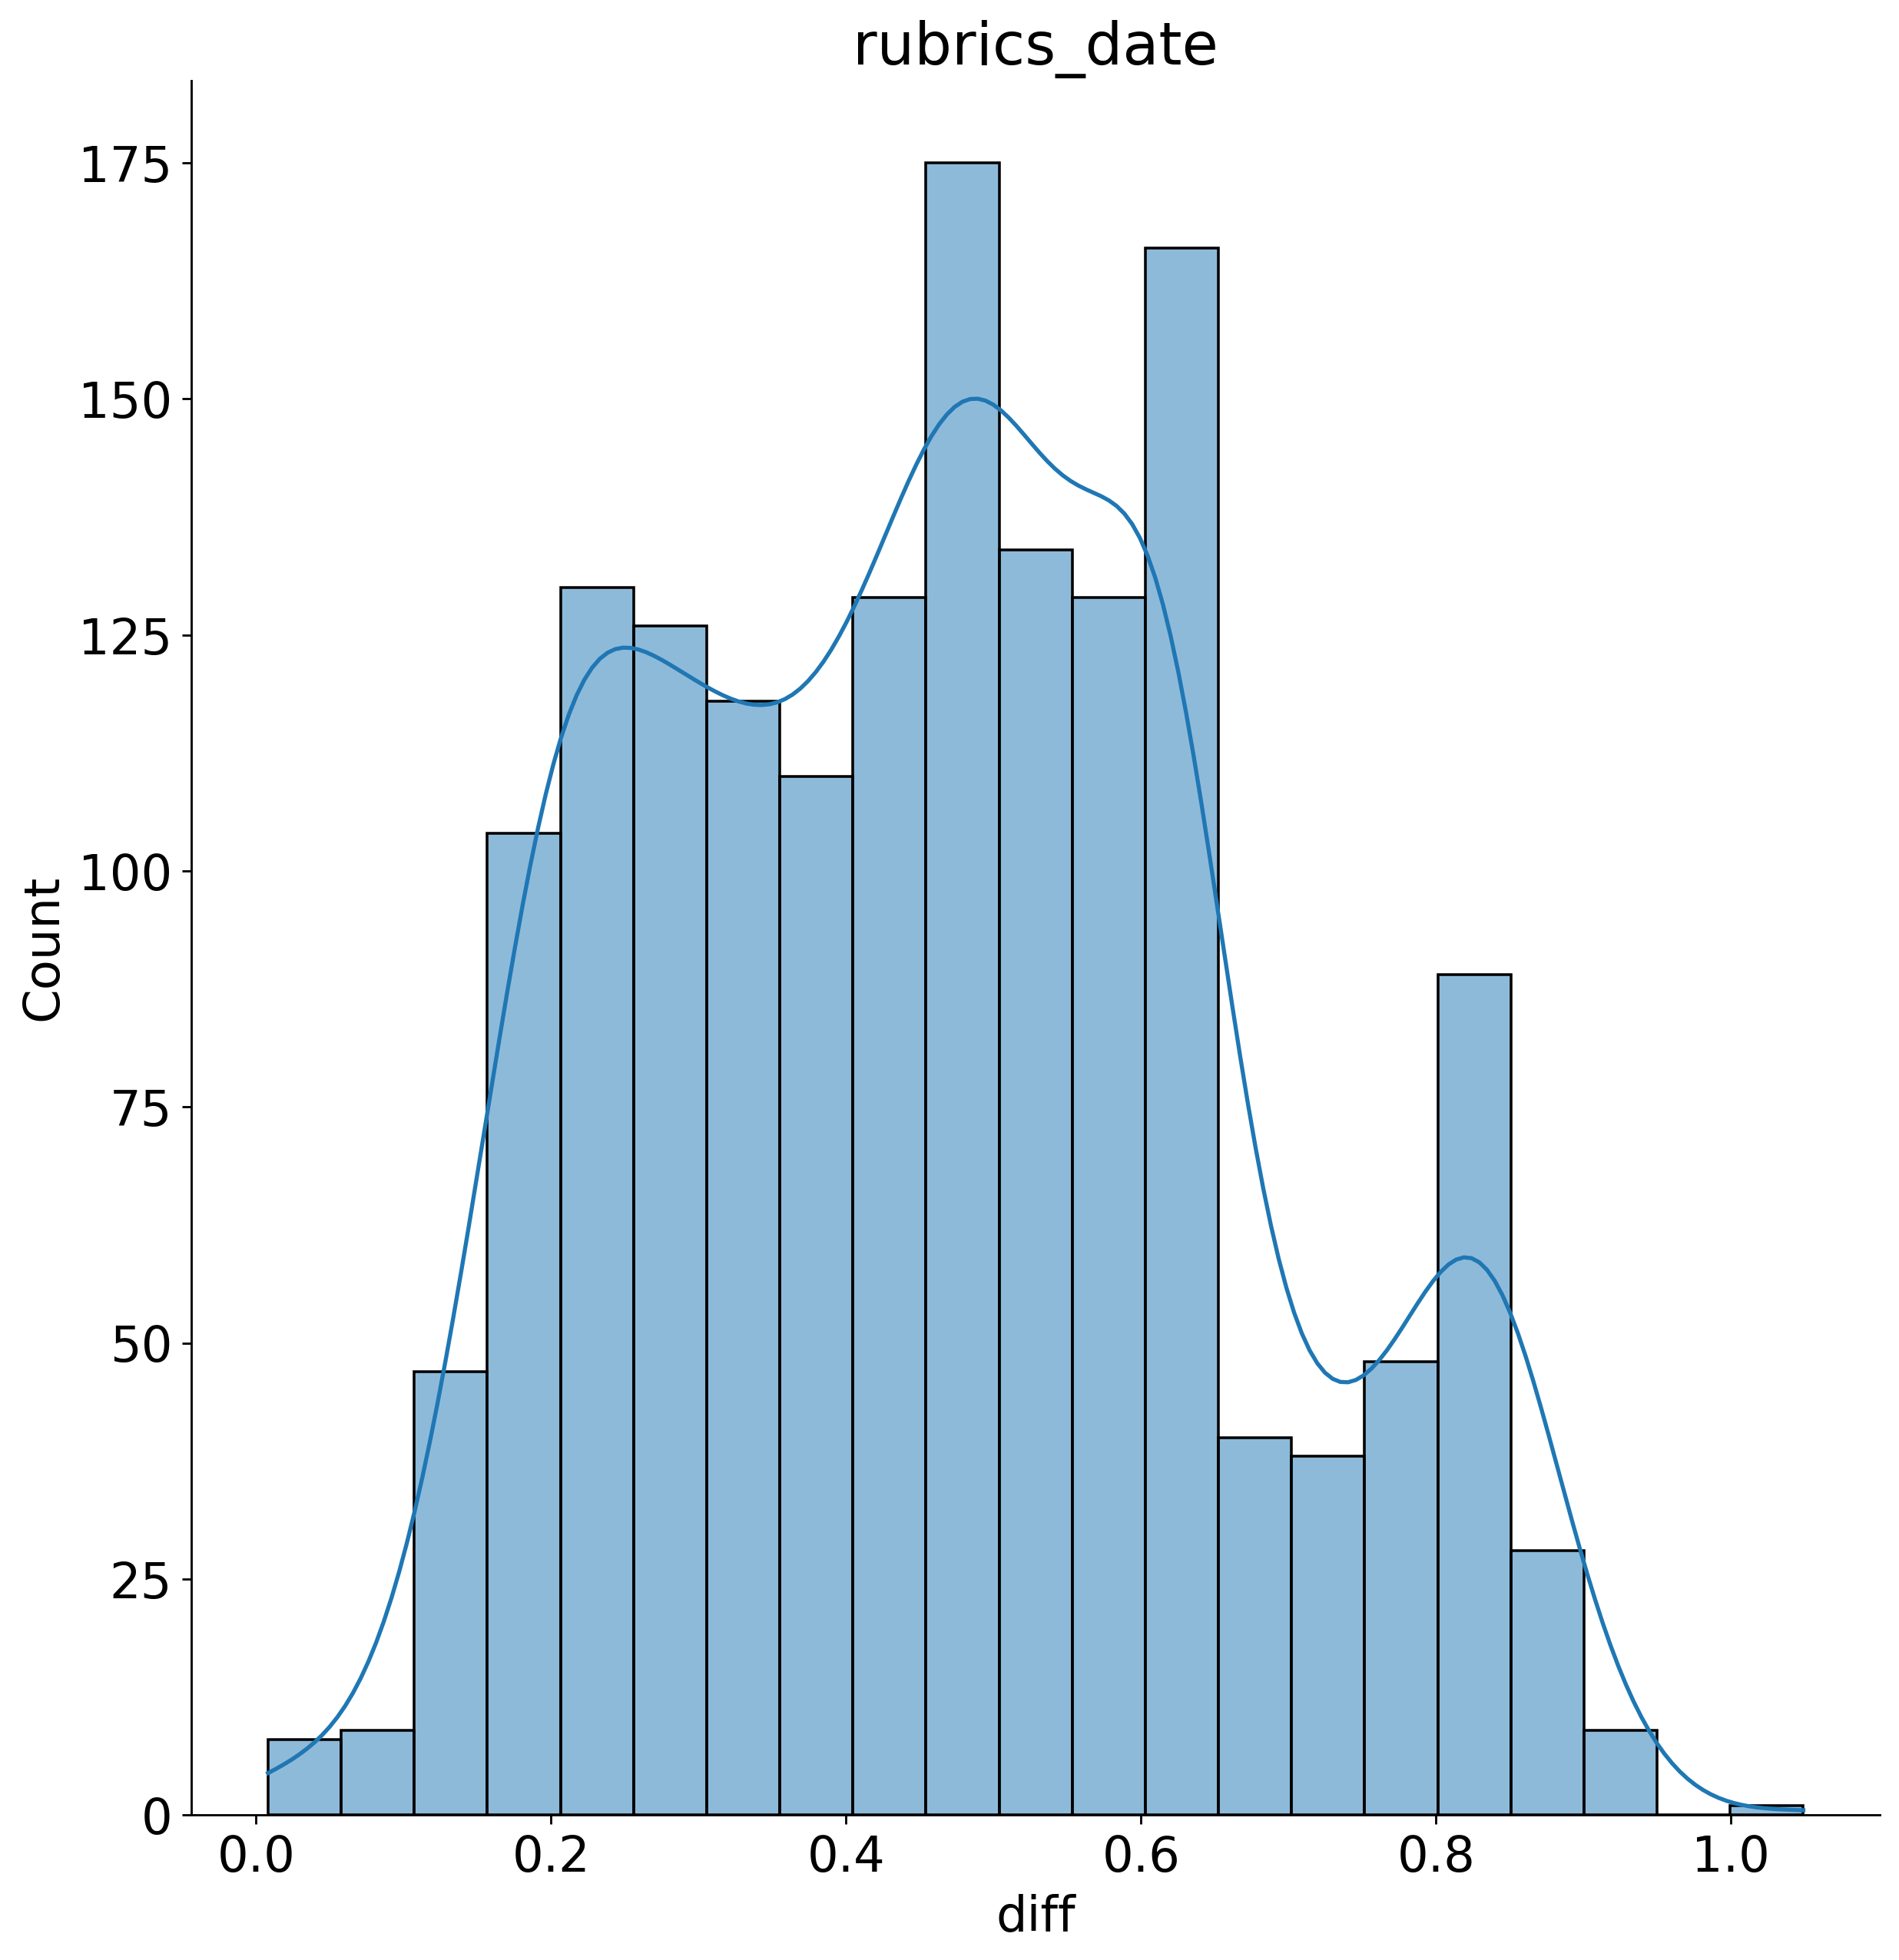

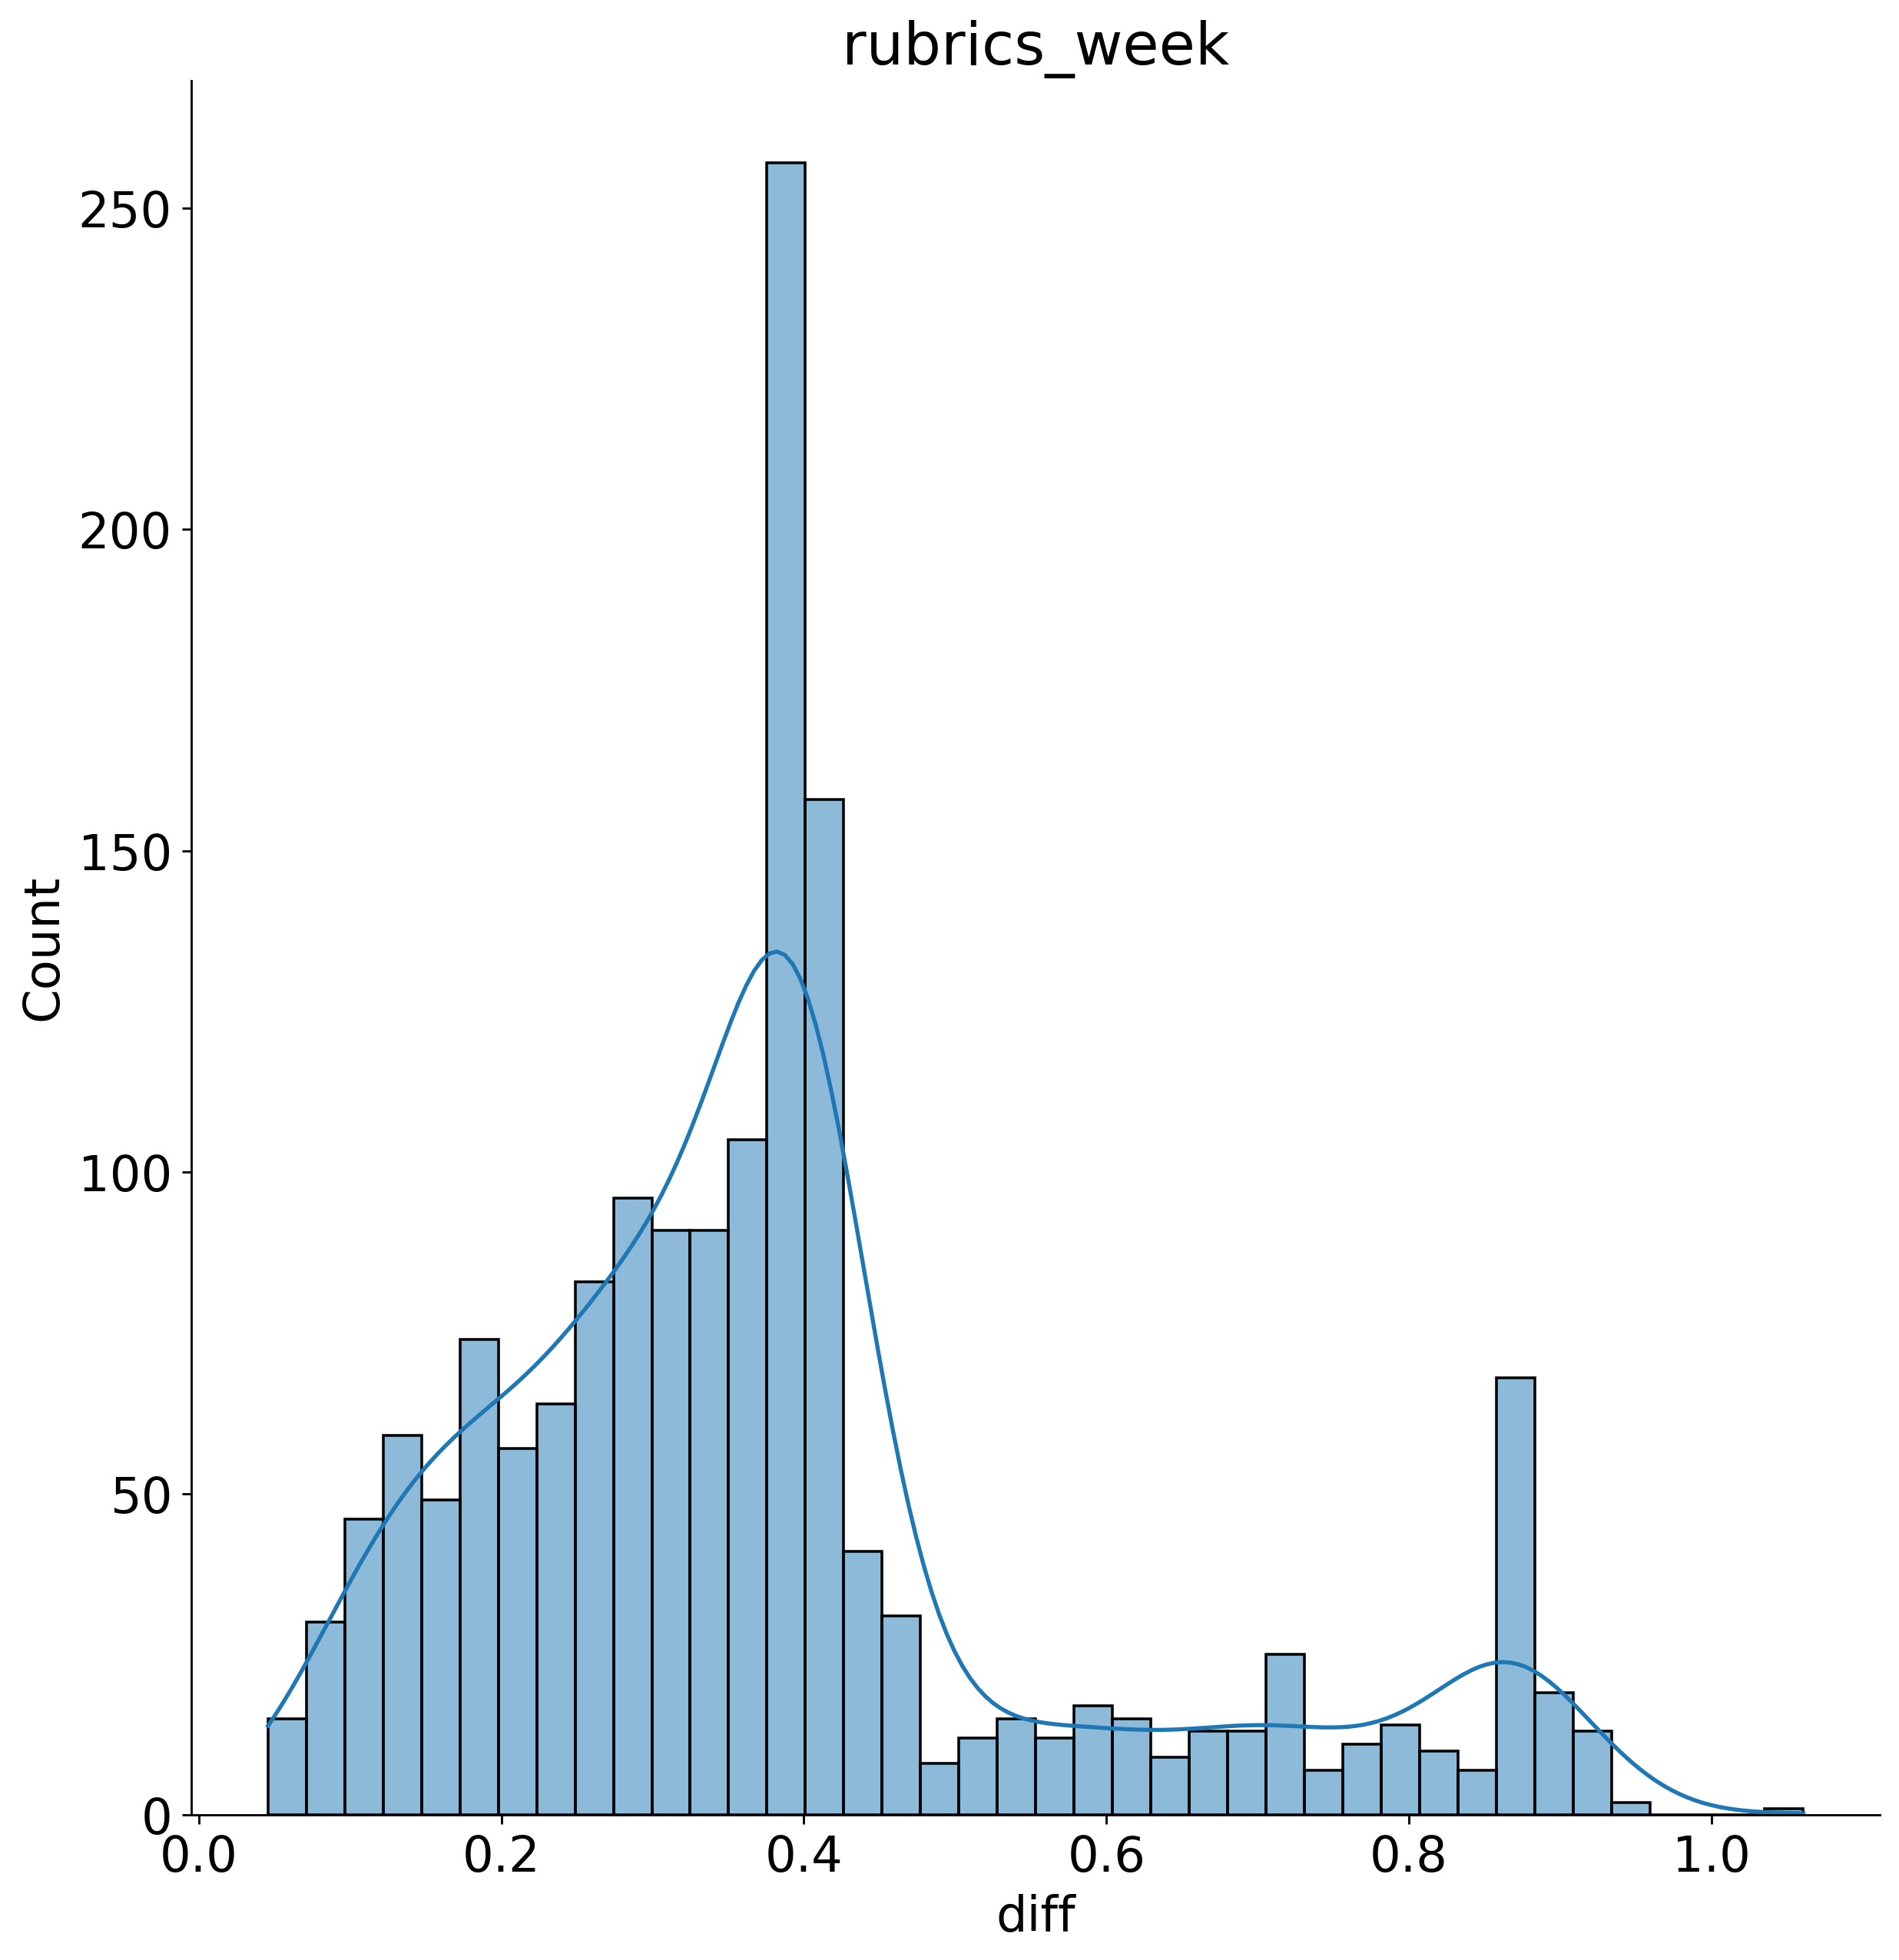

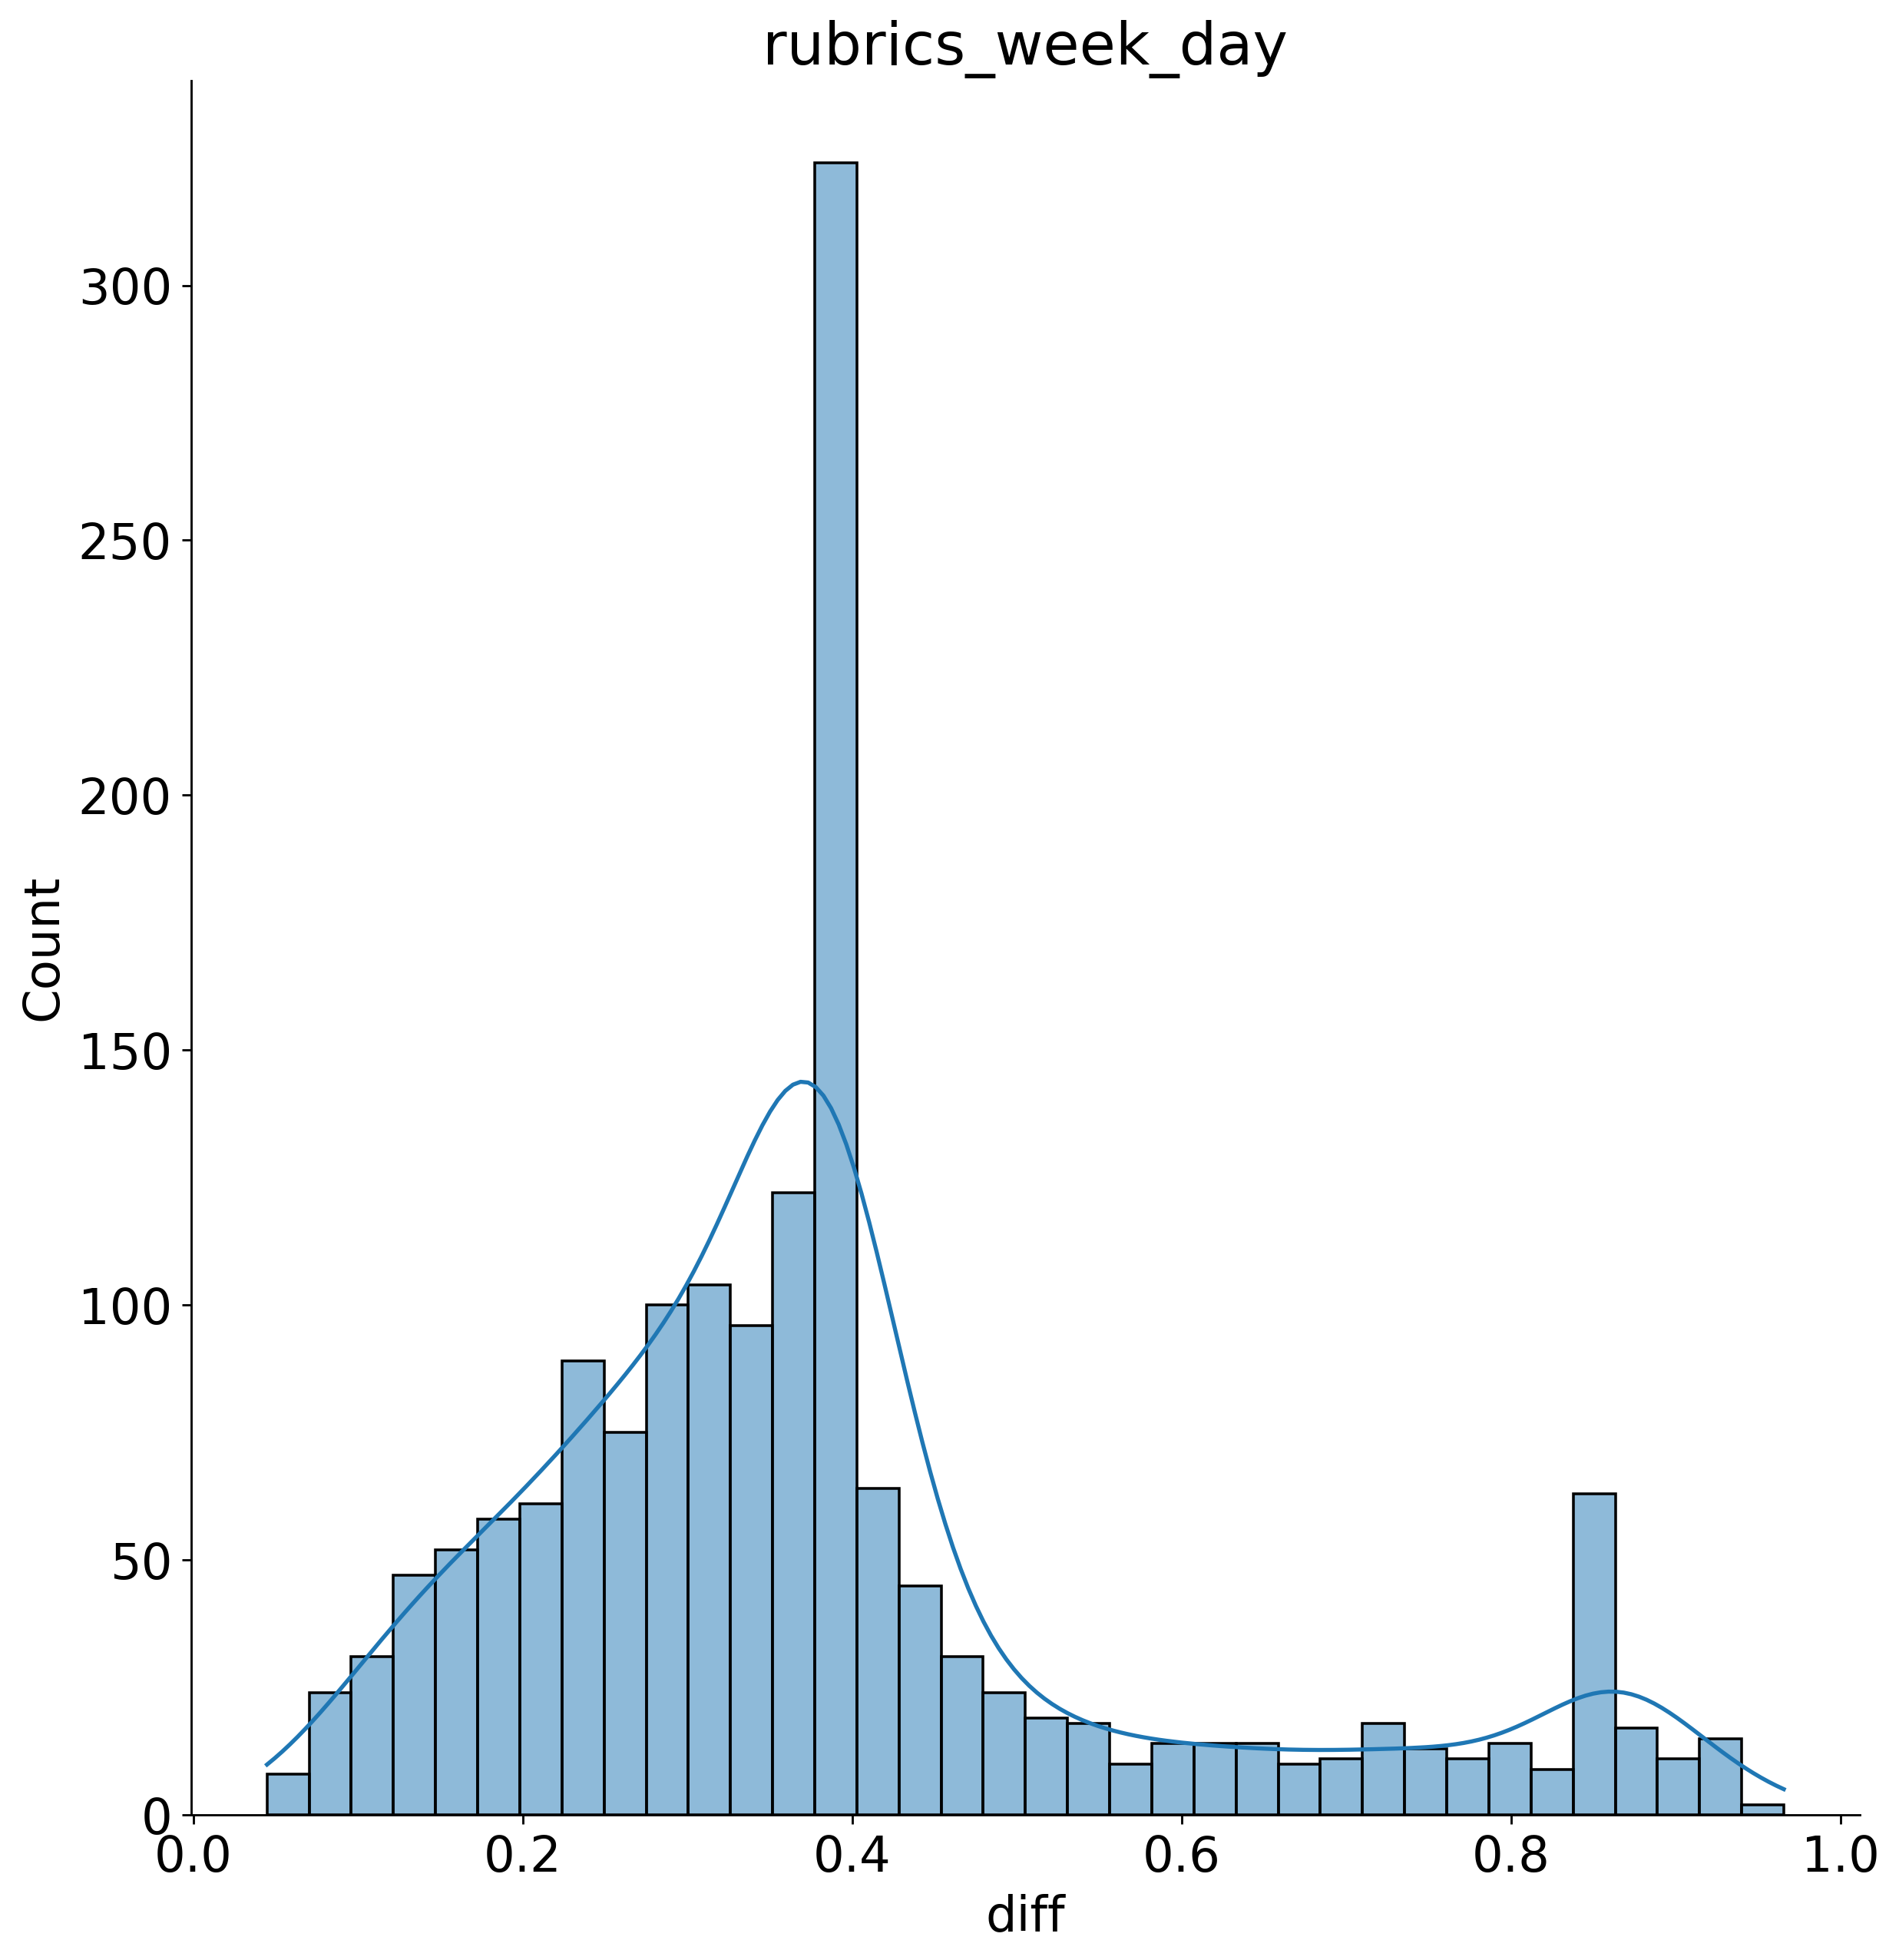

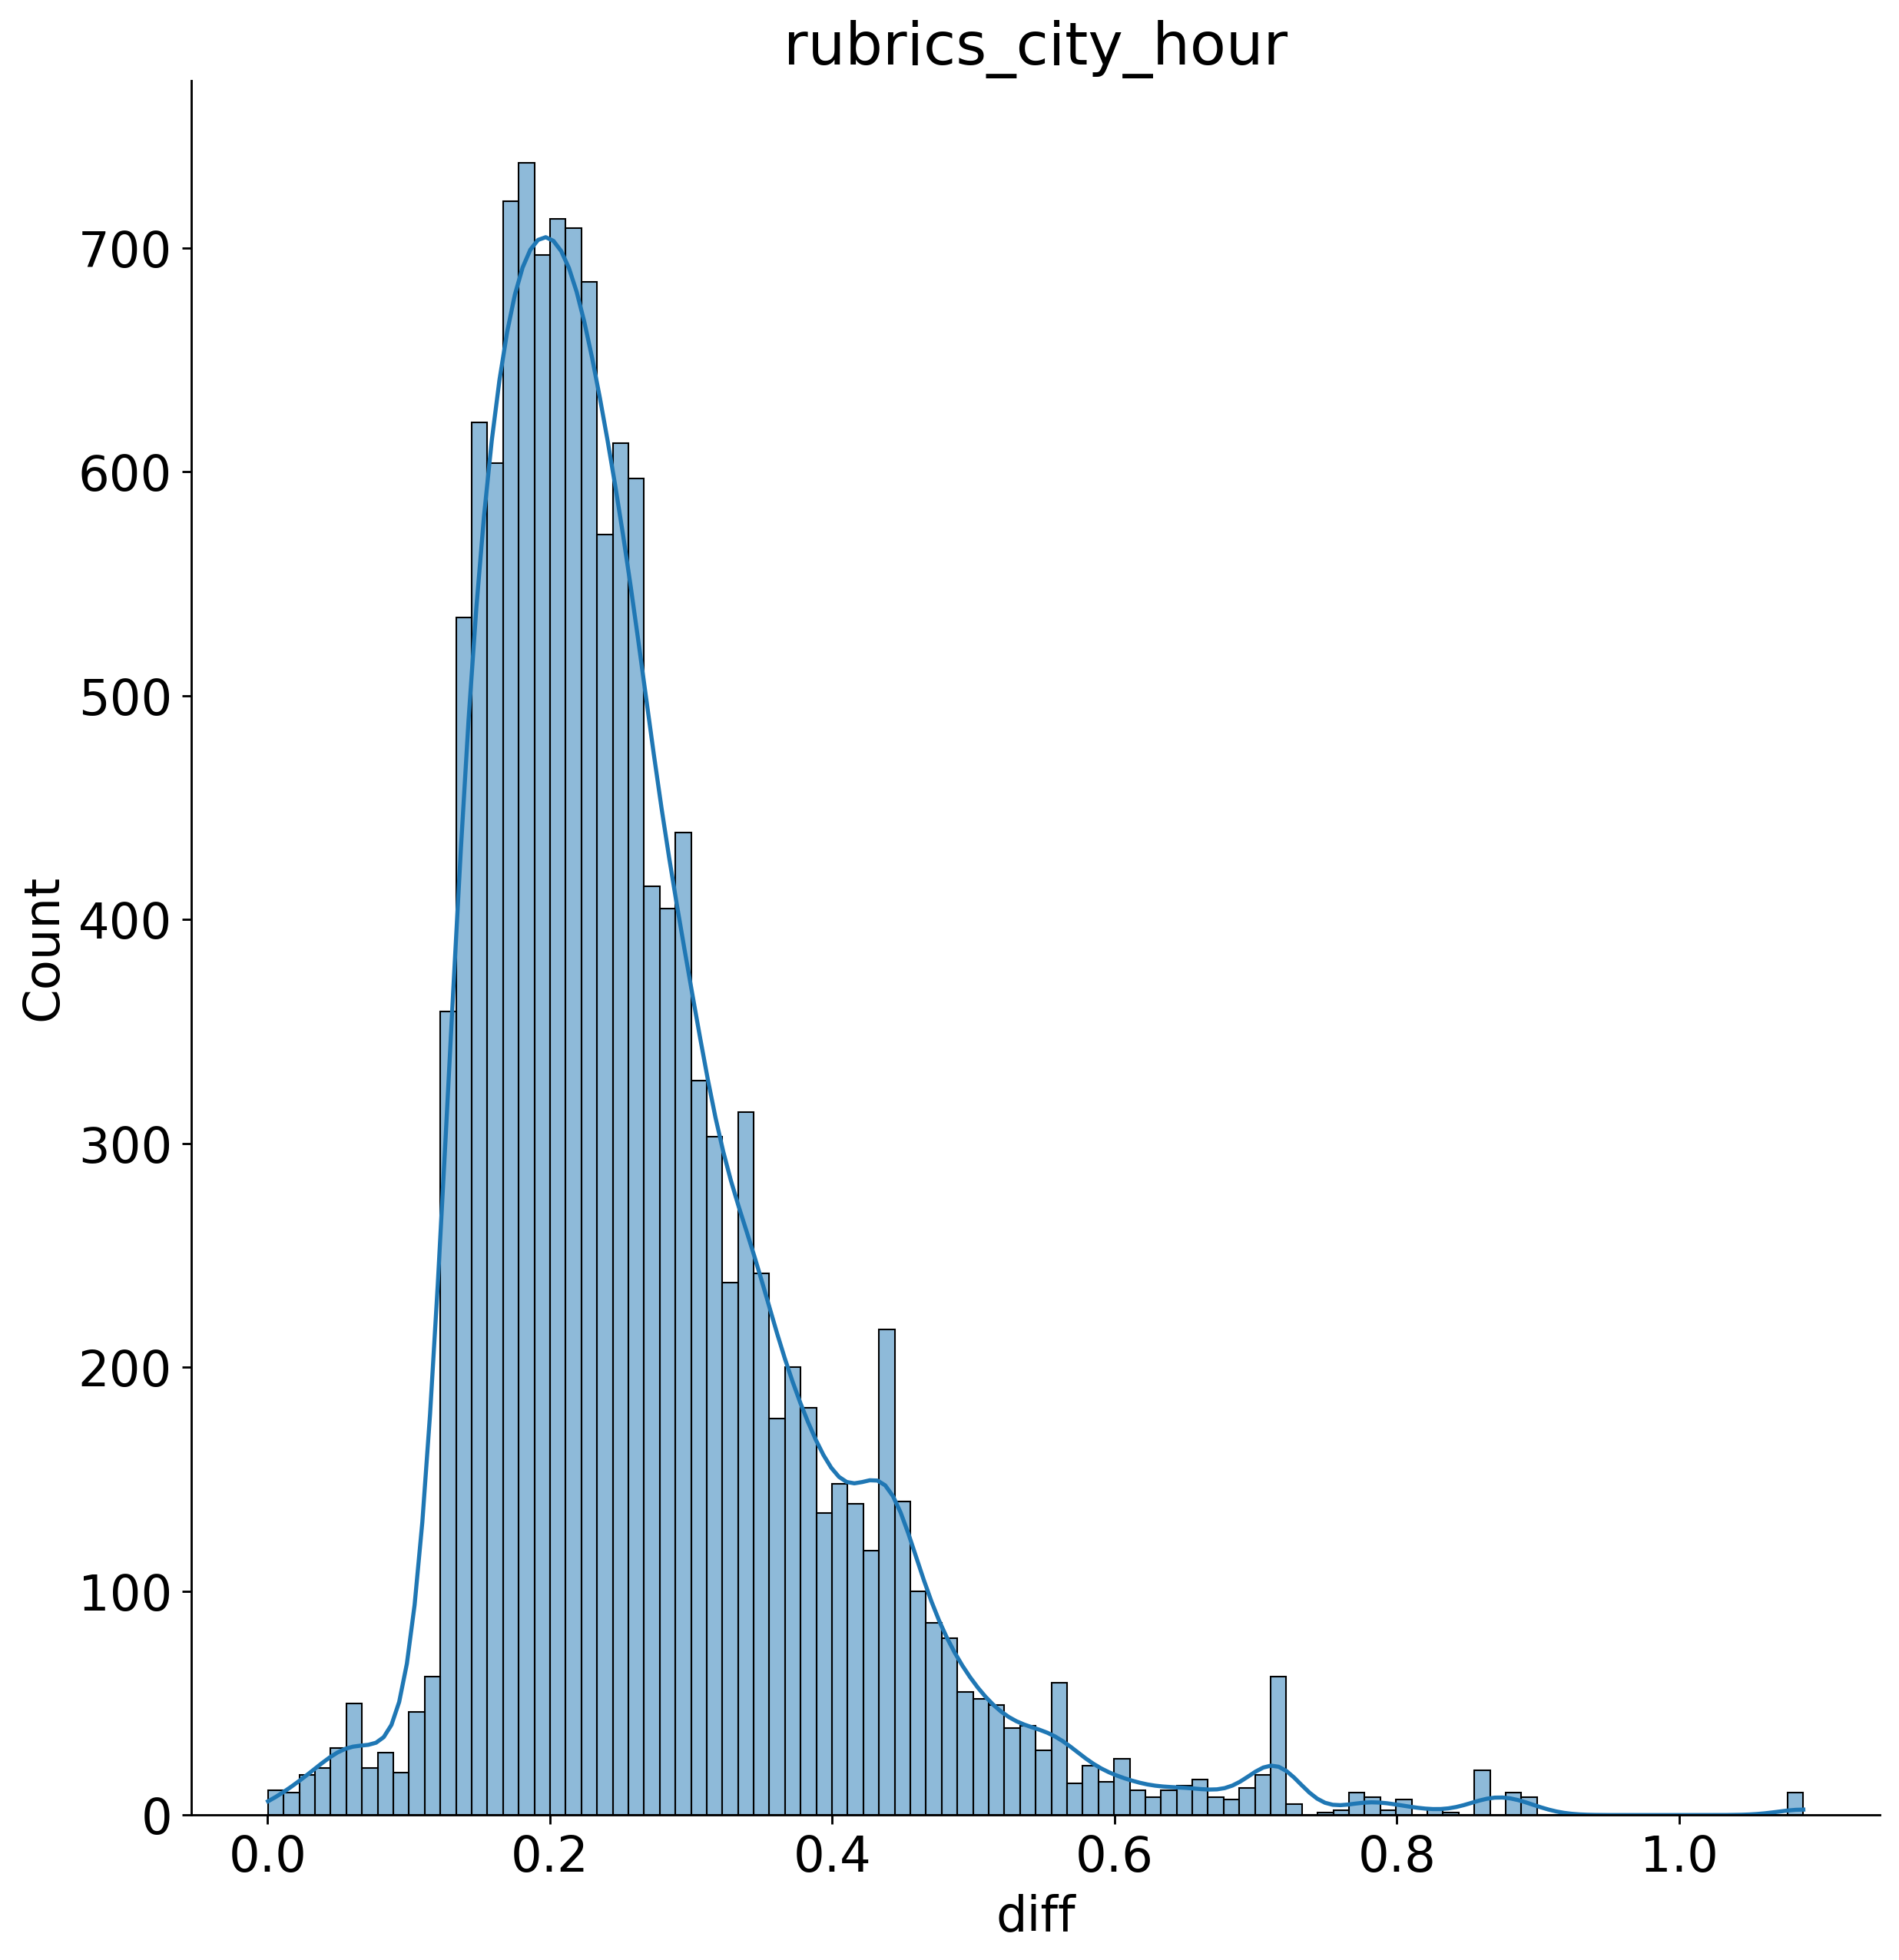

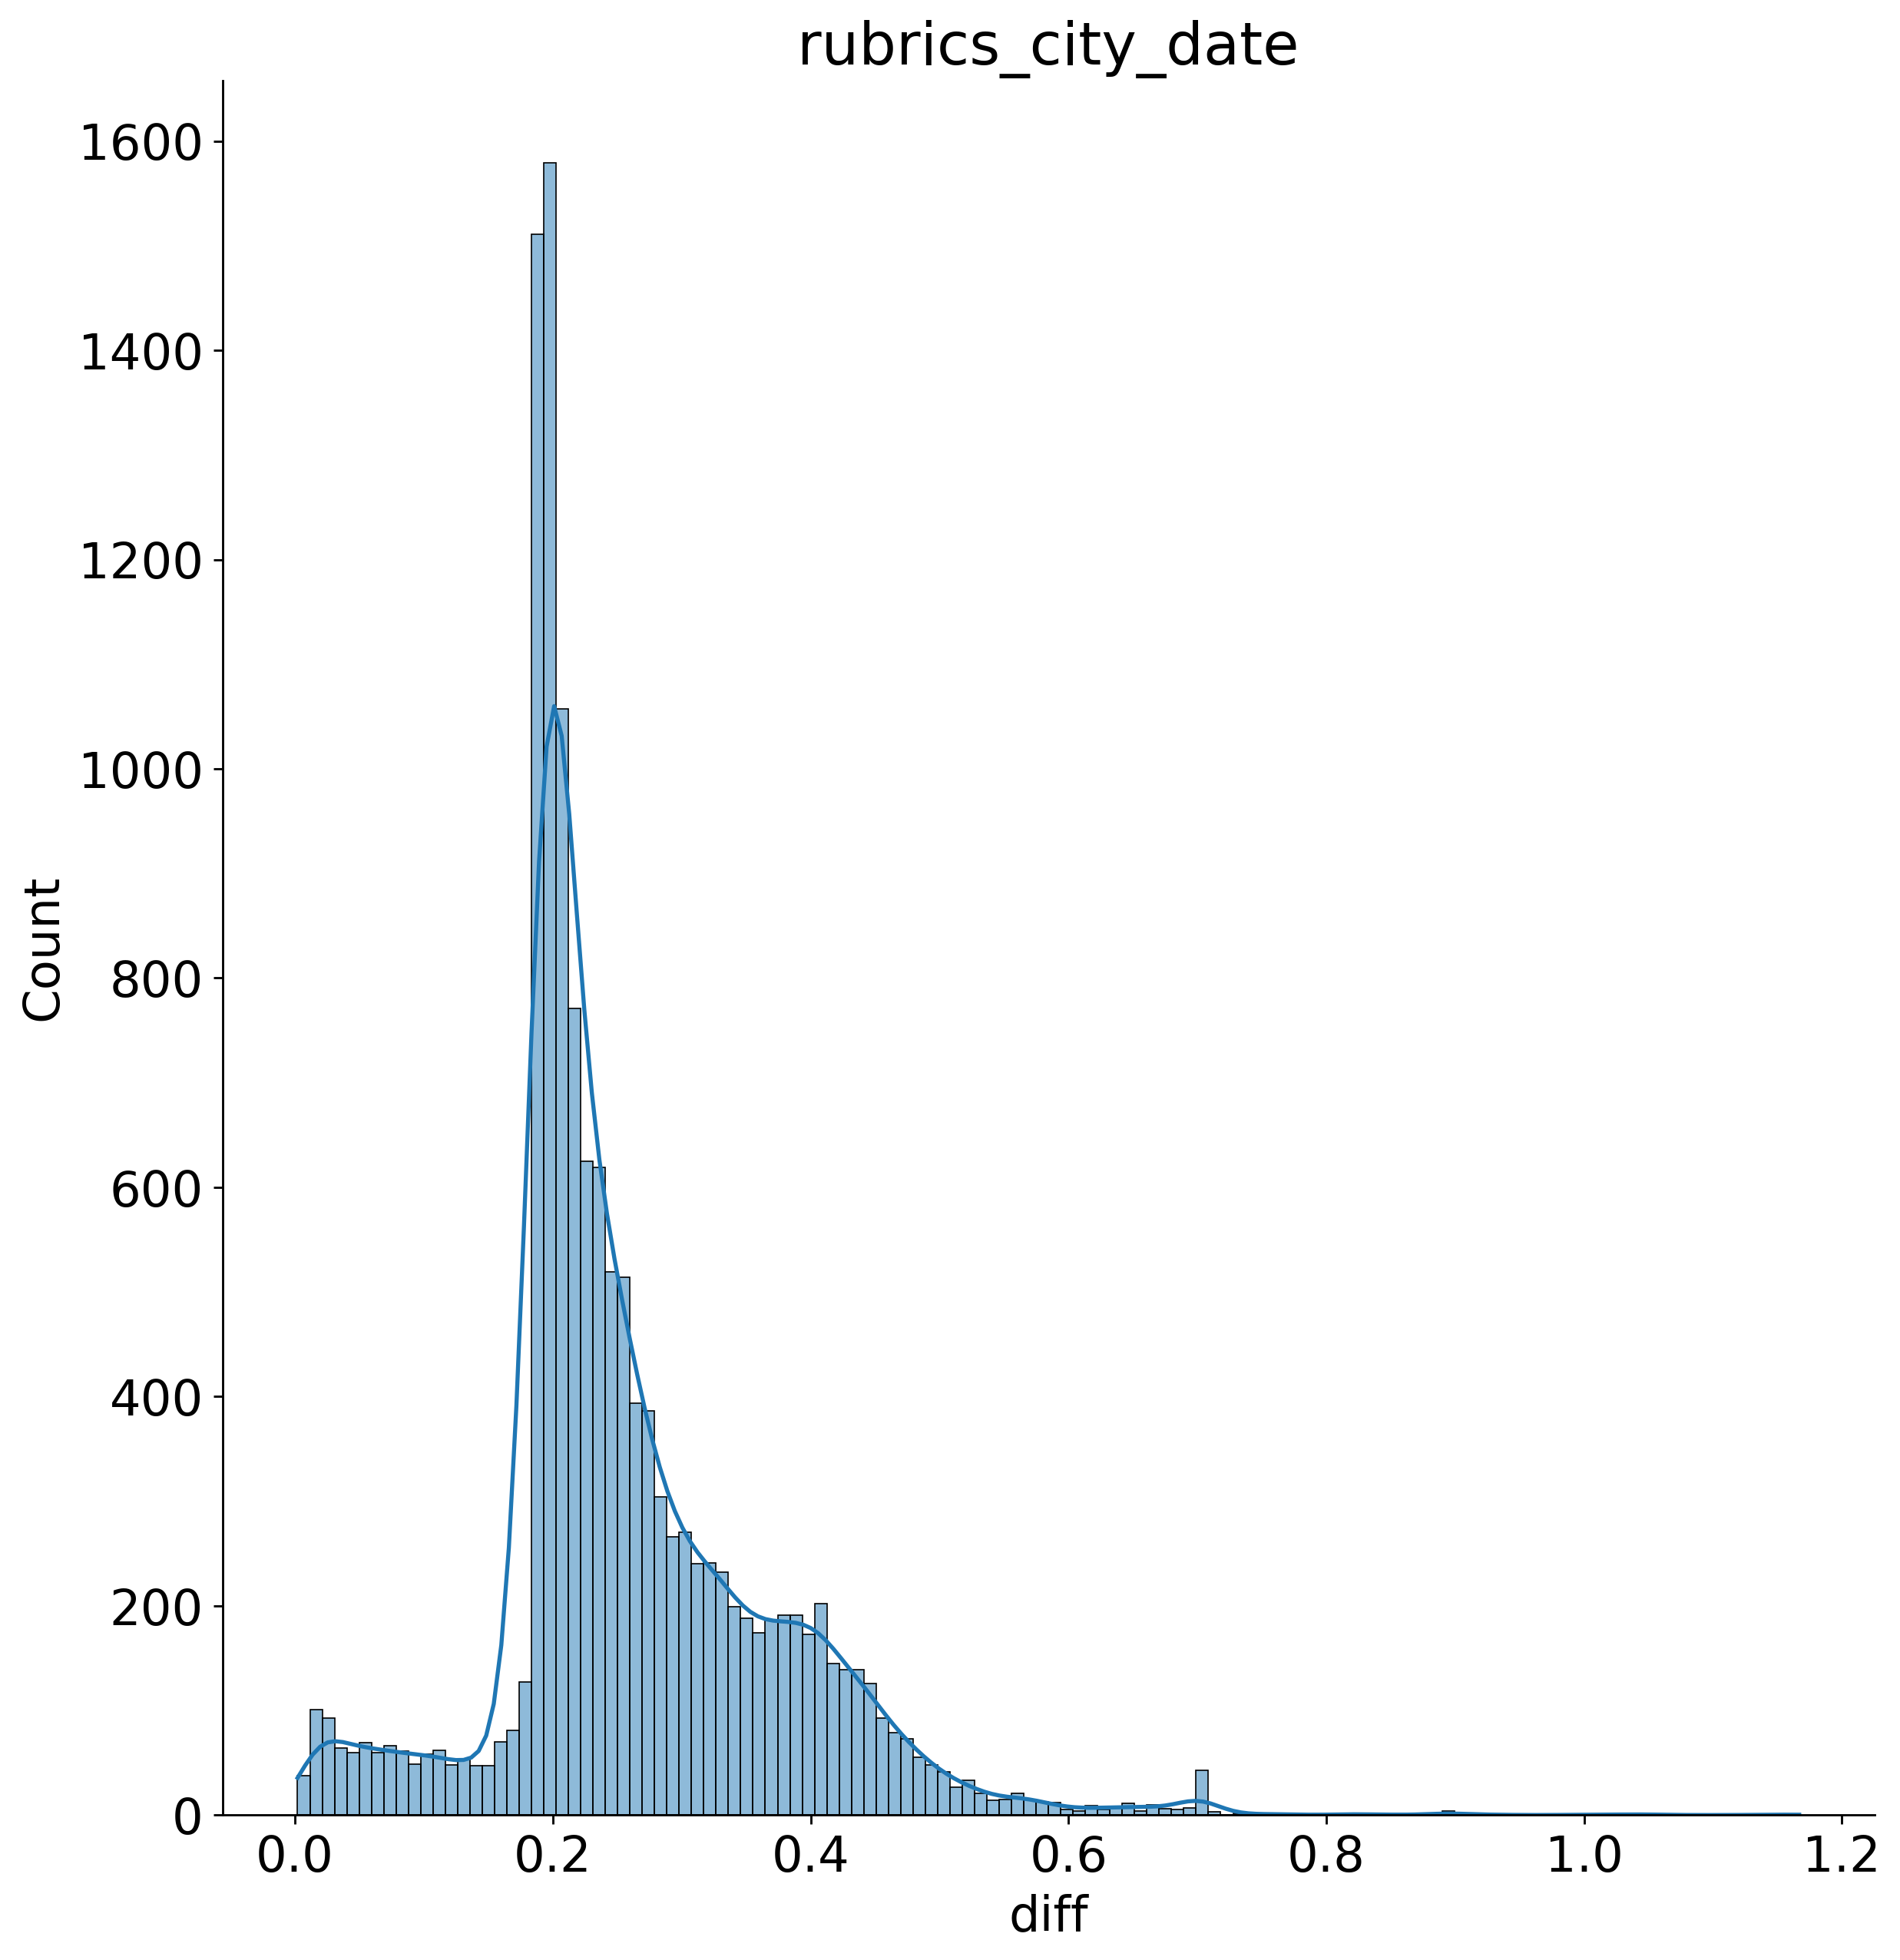

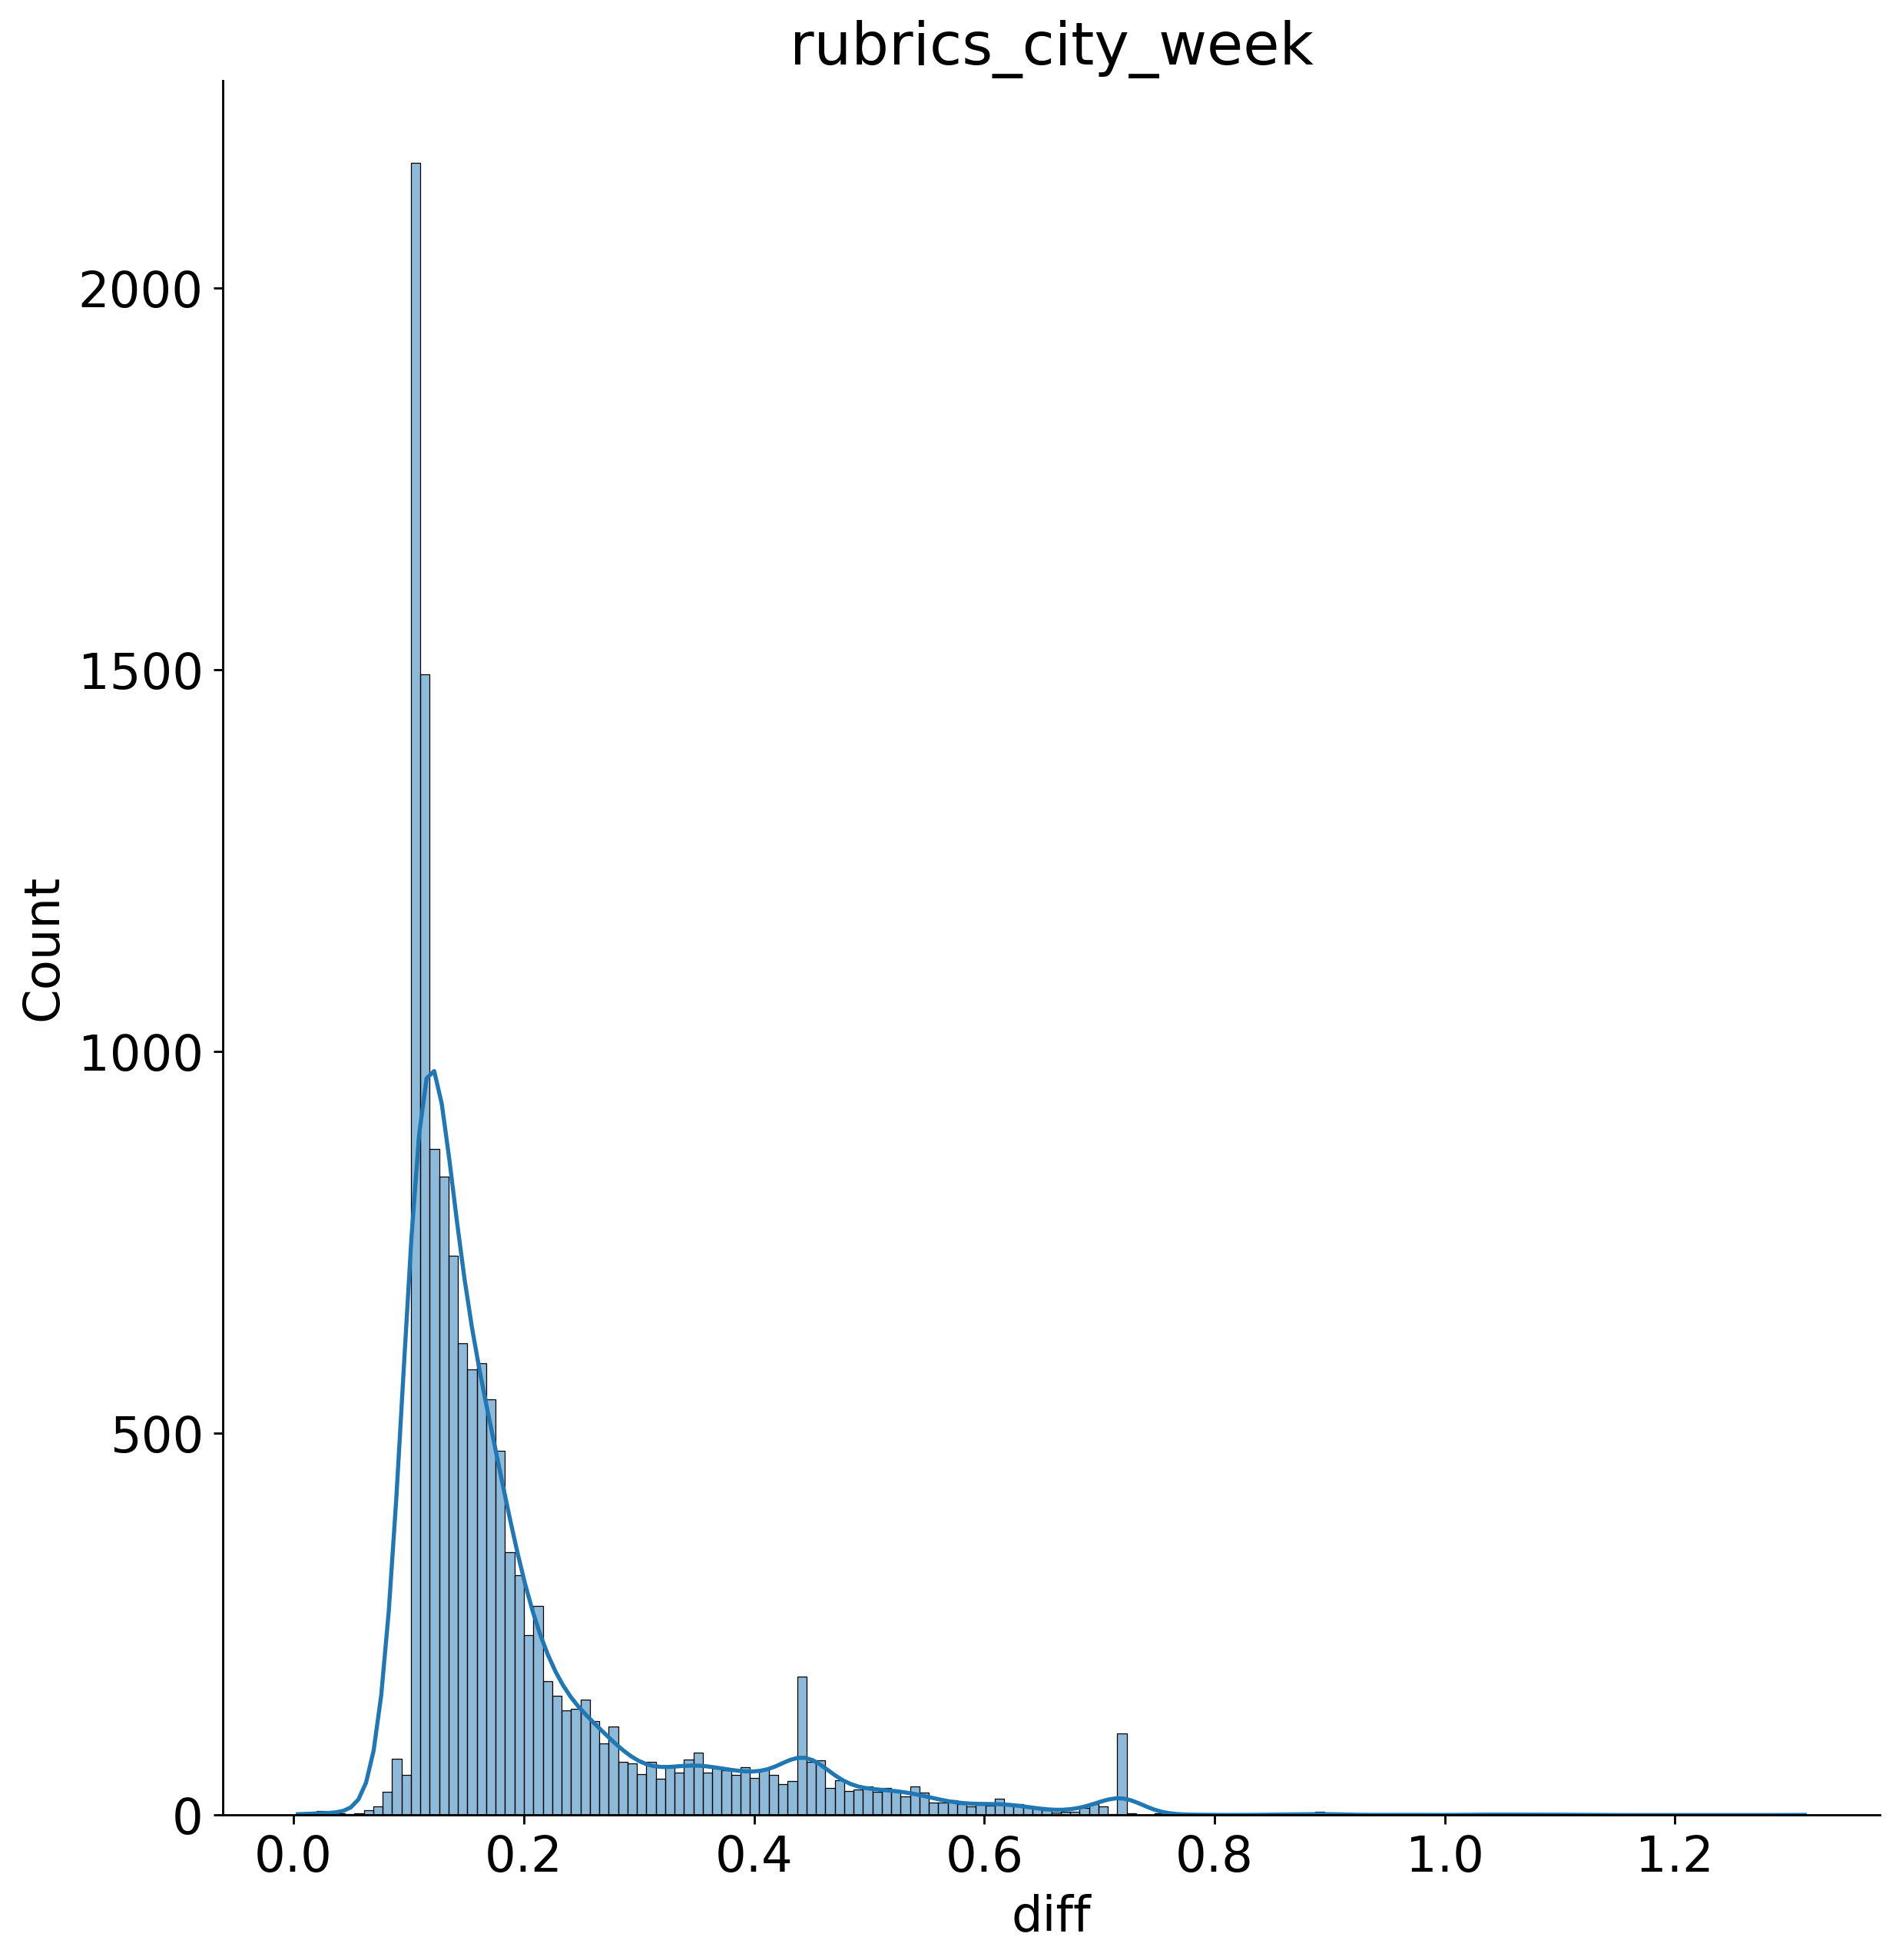

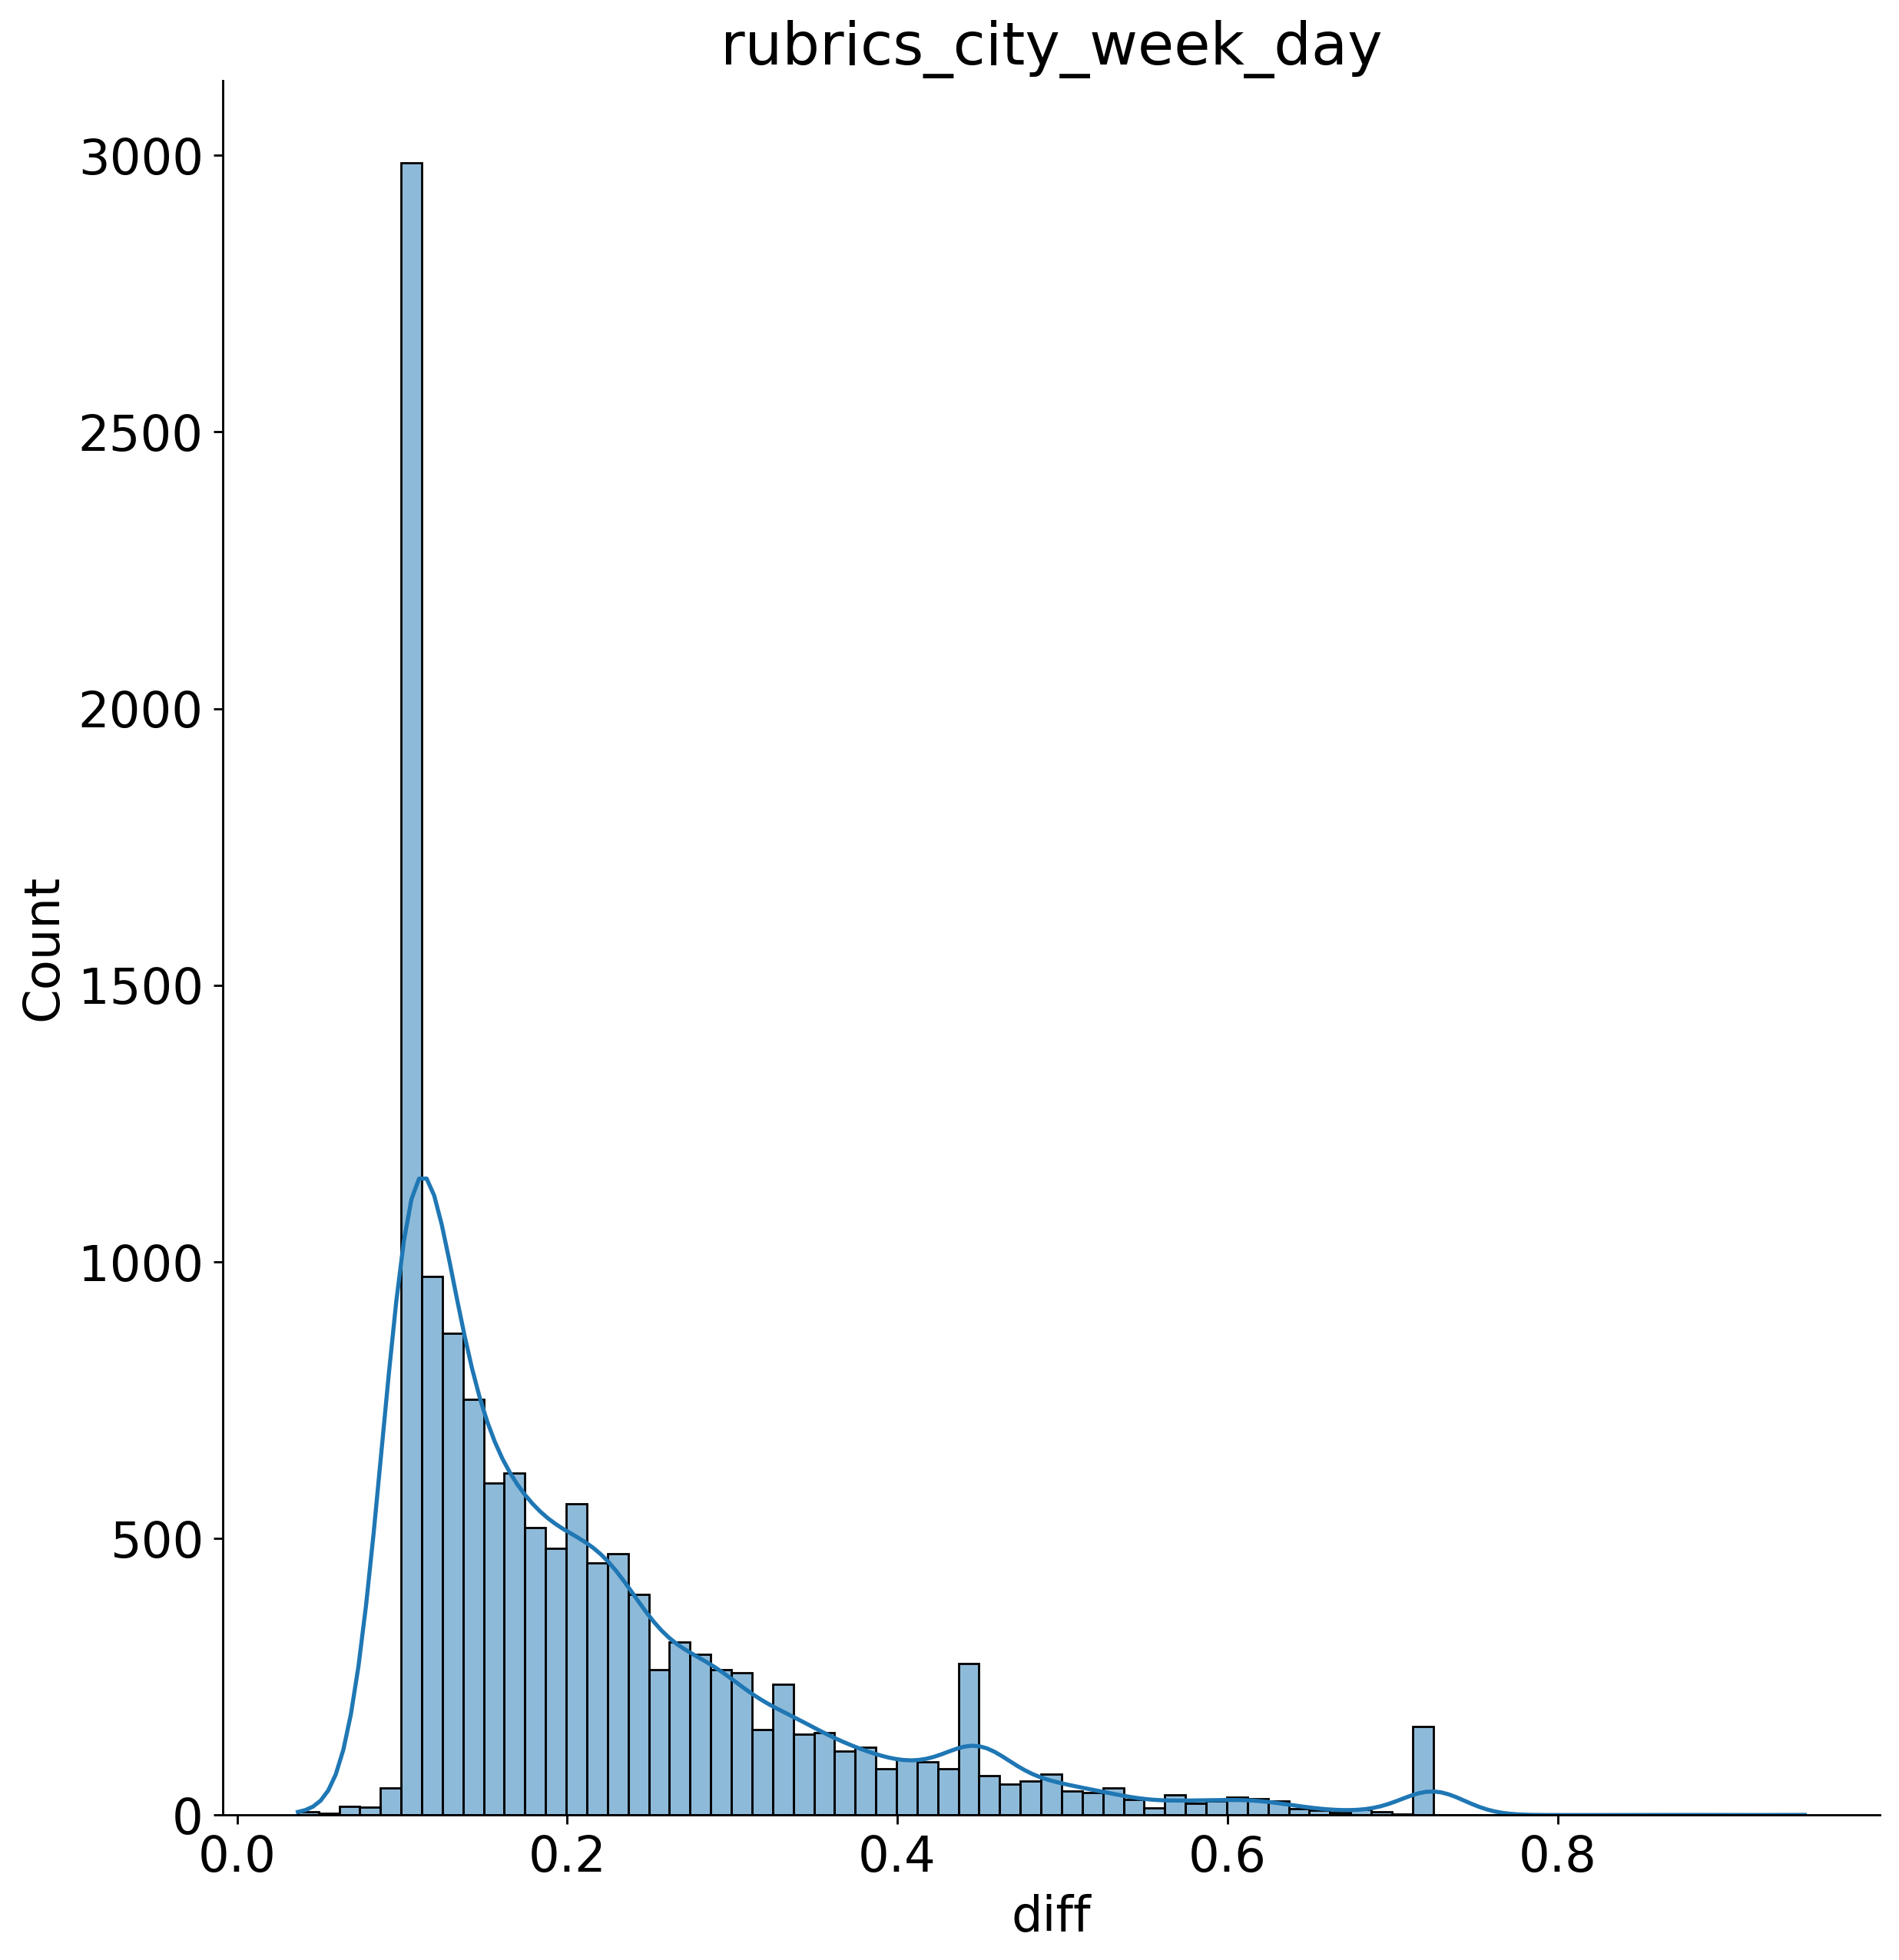

In [8]:
i = 0

for file in dates:
    for col_r in ['hour_r', 'date_r', 'week_r', 'week_day_r']:
        xr = pd.read_excel(file, sheet_name=col_r)
        file_name = file.split('\\')[-1].replace('.xlsx','').replace('df_dates_','')
        sns_plot = sns.displot(data=xr, x="diff", kde=True, height=10).set(title=f'{file_name}_{col_r}'.replace('_r',''))
        fig = sns_plot.figure
        i+=1
        #fig.savefig(f"pictures/ten_city/displot_{i}.png")

In [ ]:
Схожесть городов по: часам, датам, неделям, дням недели
Схожесть бизнесов по: часам, датам, неделям, дням недели
Схожесть бизнесов в городах по: часам, датам, неделям, дням недели

In [27]:
[i.split('\\')[-1].replace('.xlsx','').replace('df_dates_','') for i in dates]

['city', 'rubrics', 'rubrics_city']

In [ ]:
two_dict = {}

In [ ]:
fig.set_te

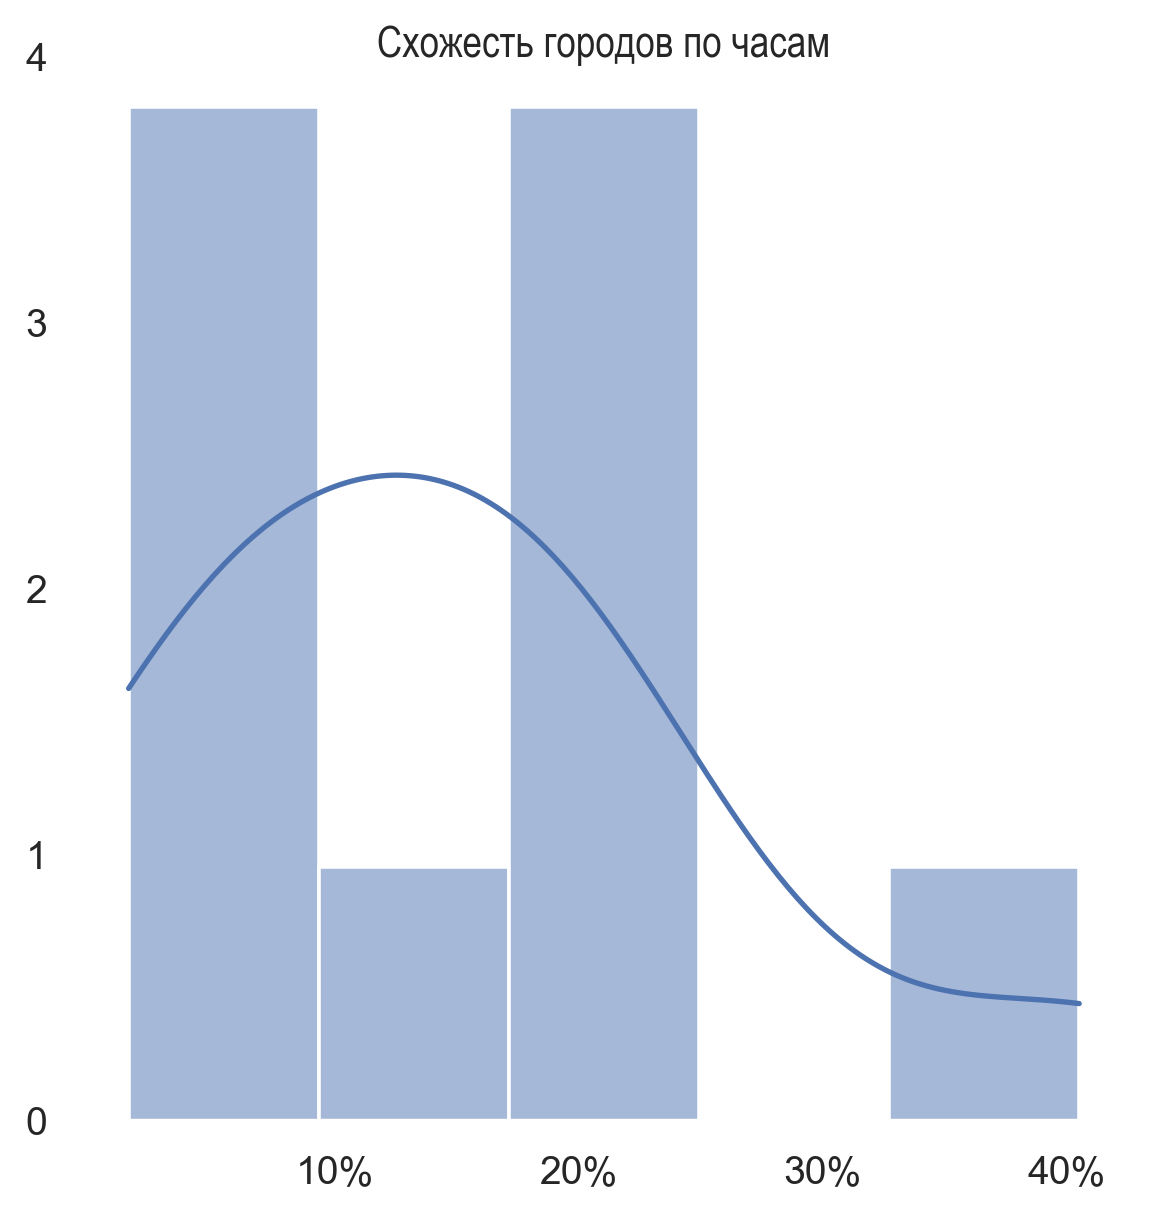

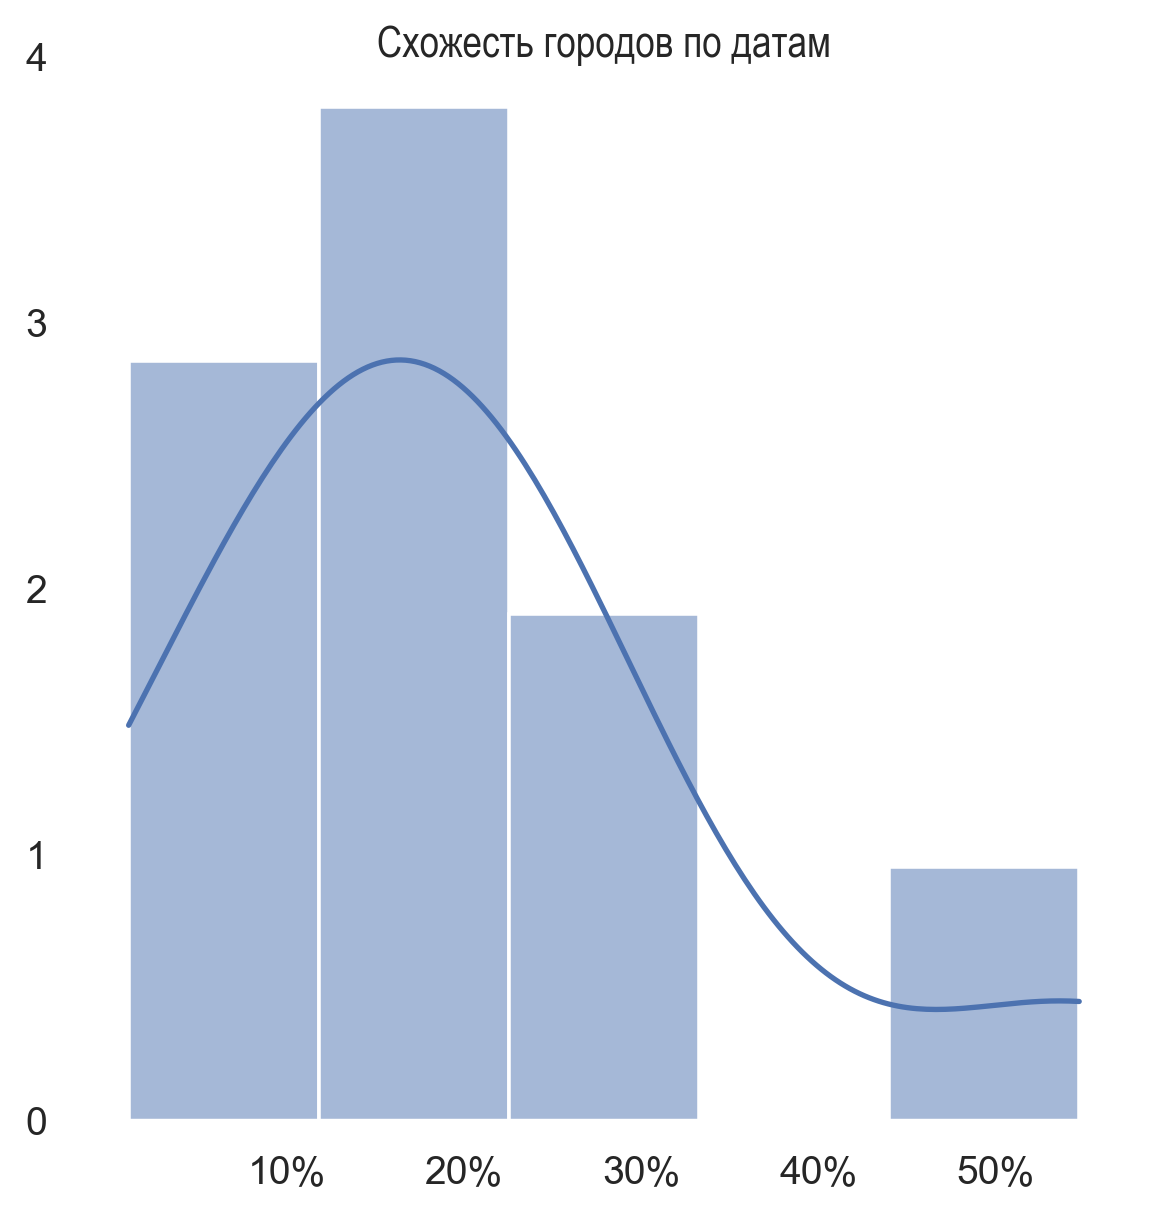

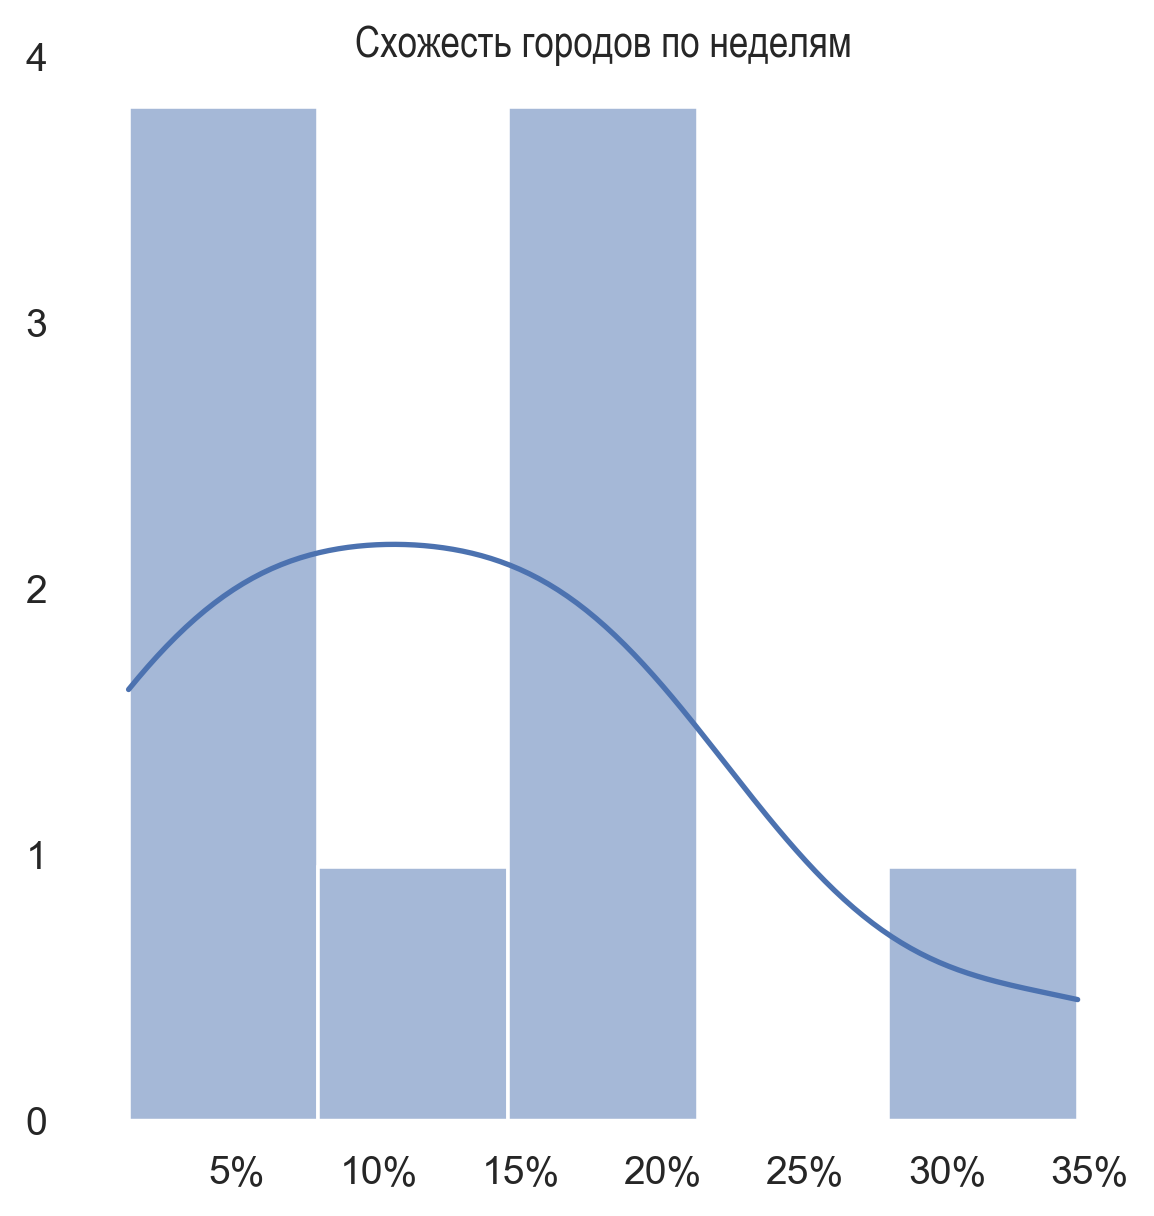

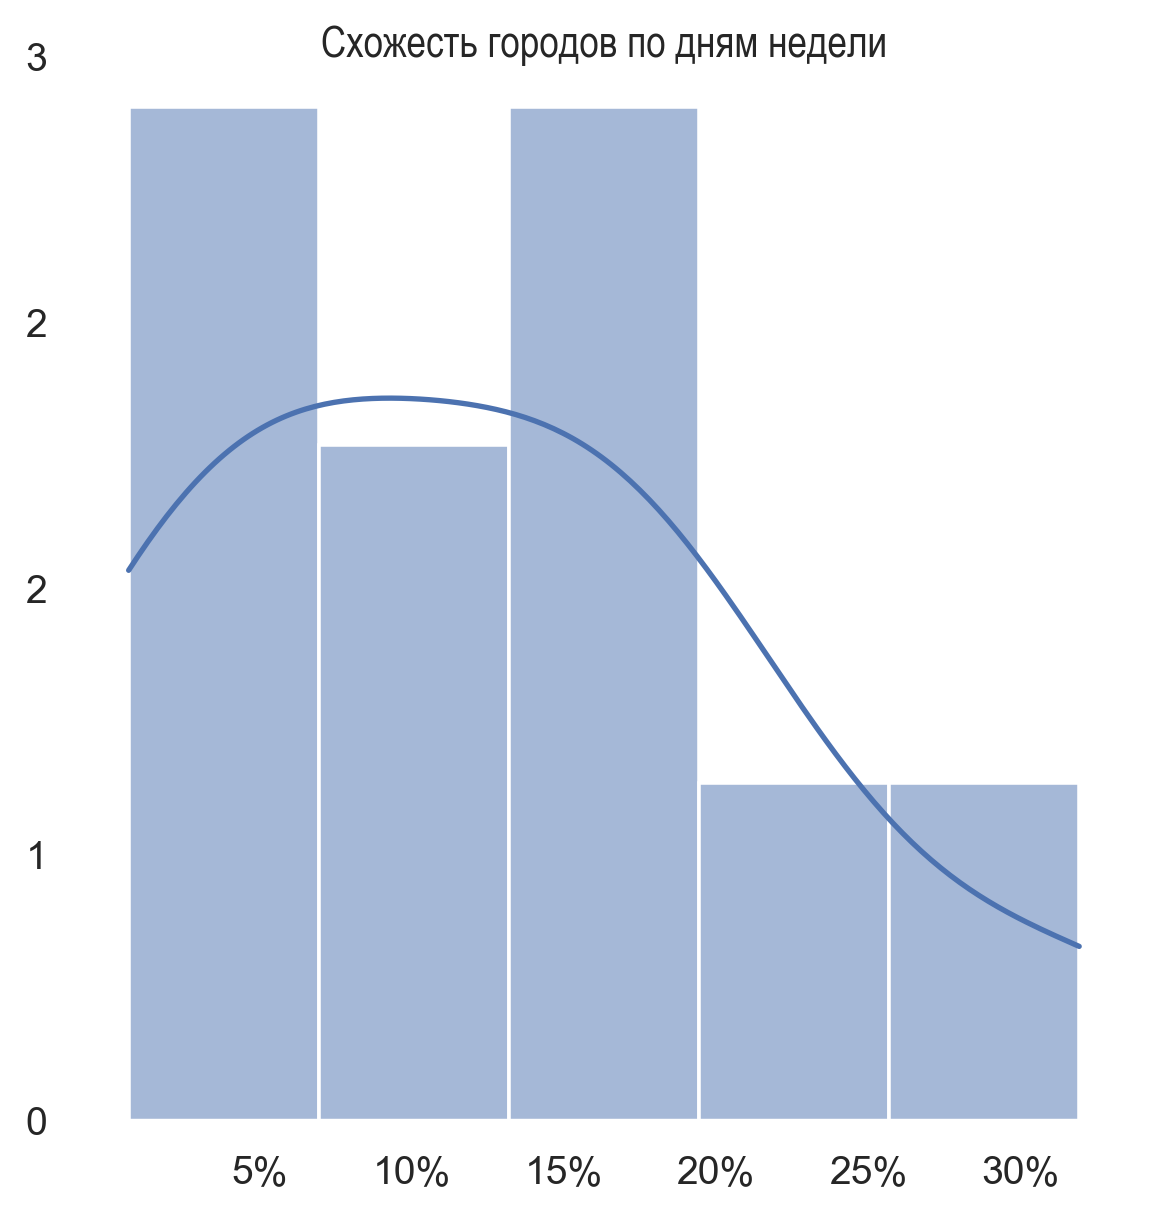

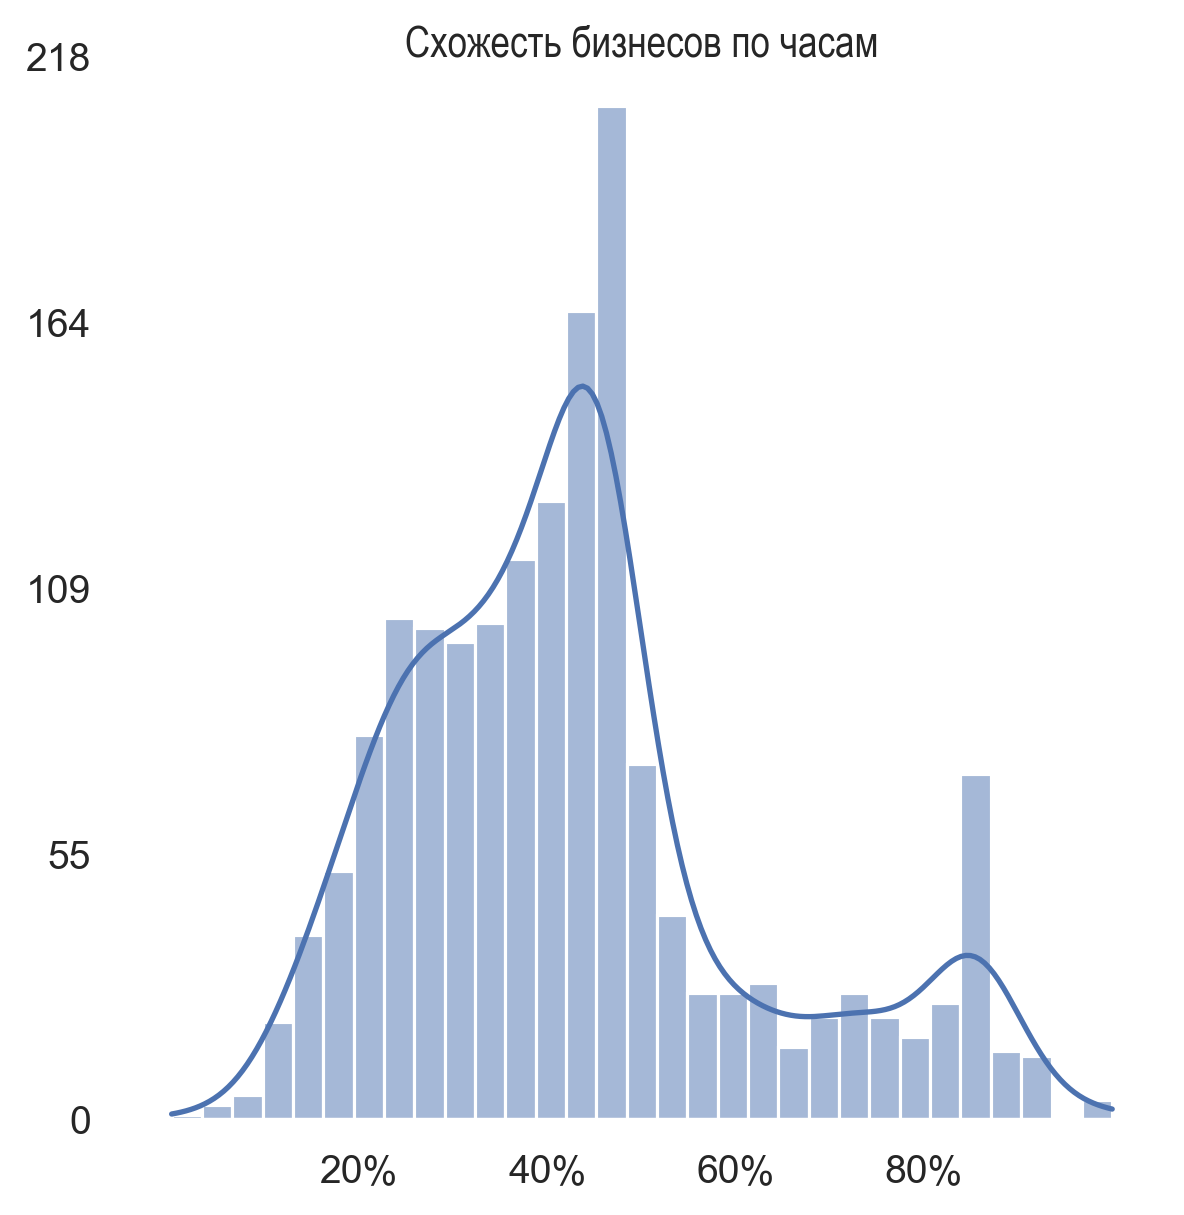

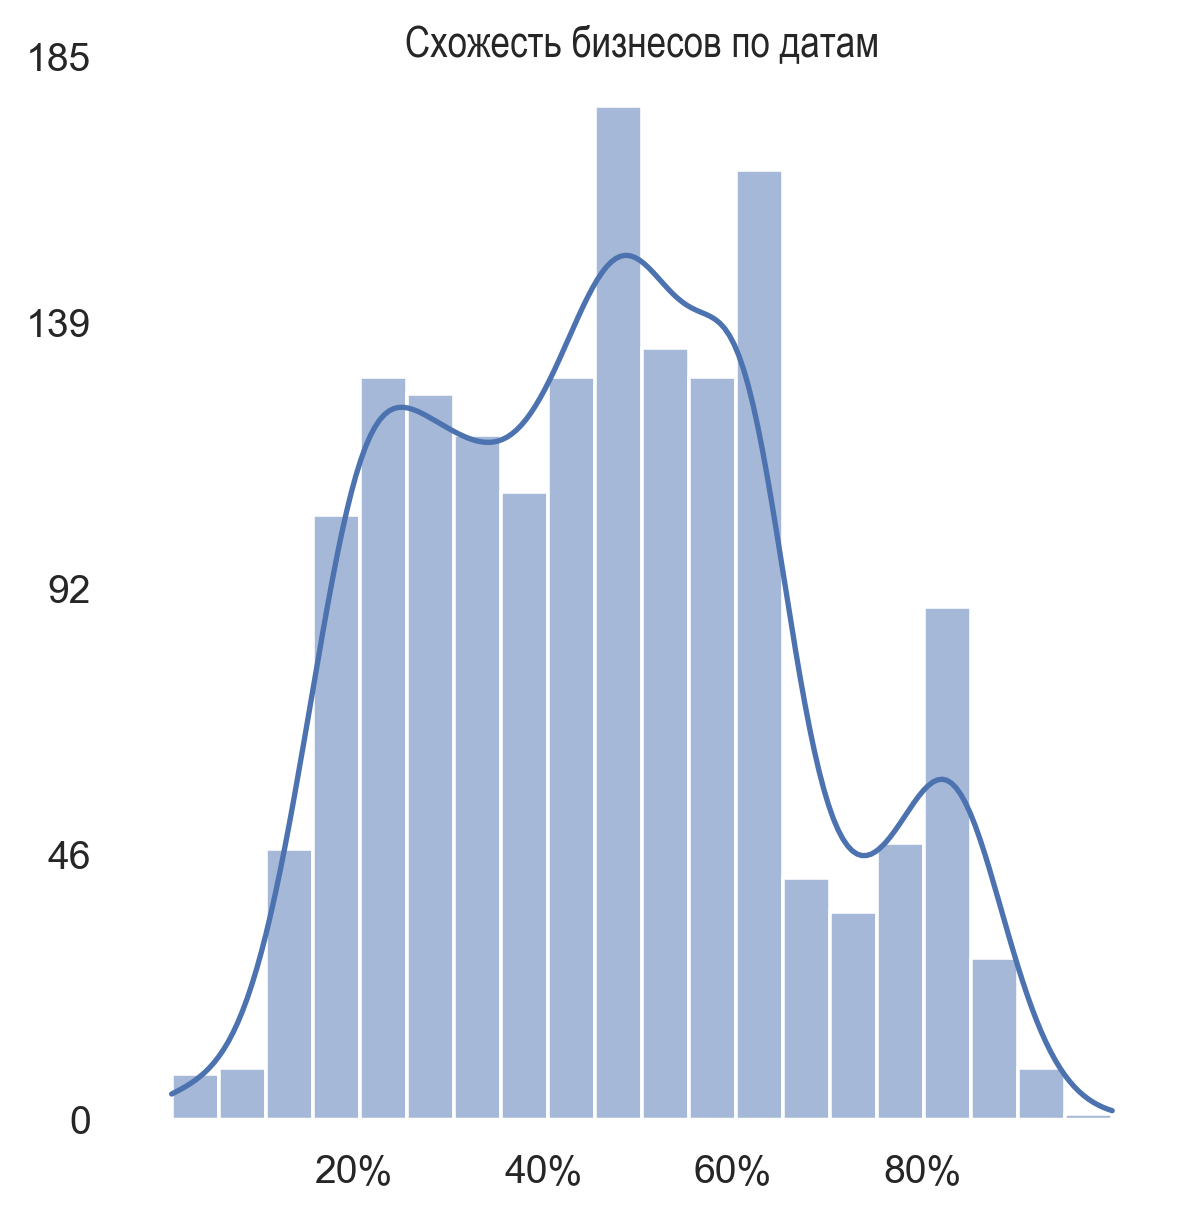

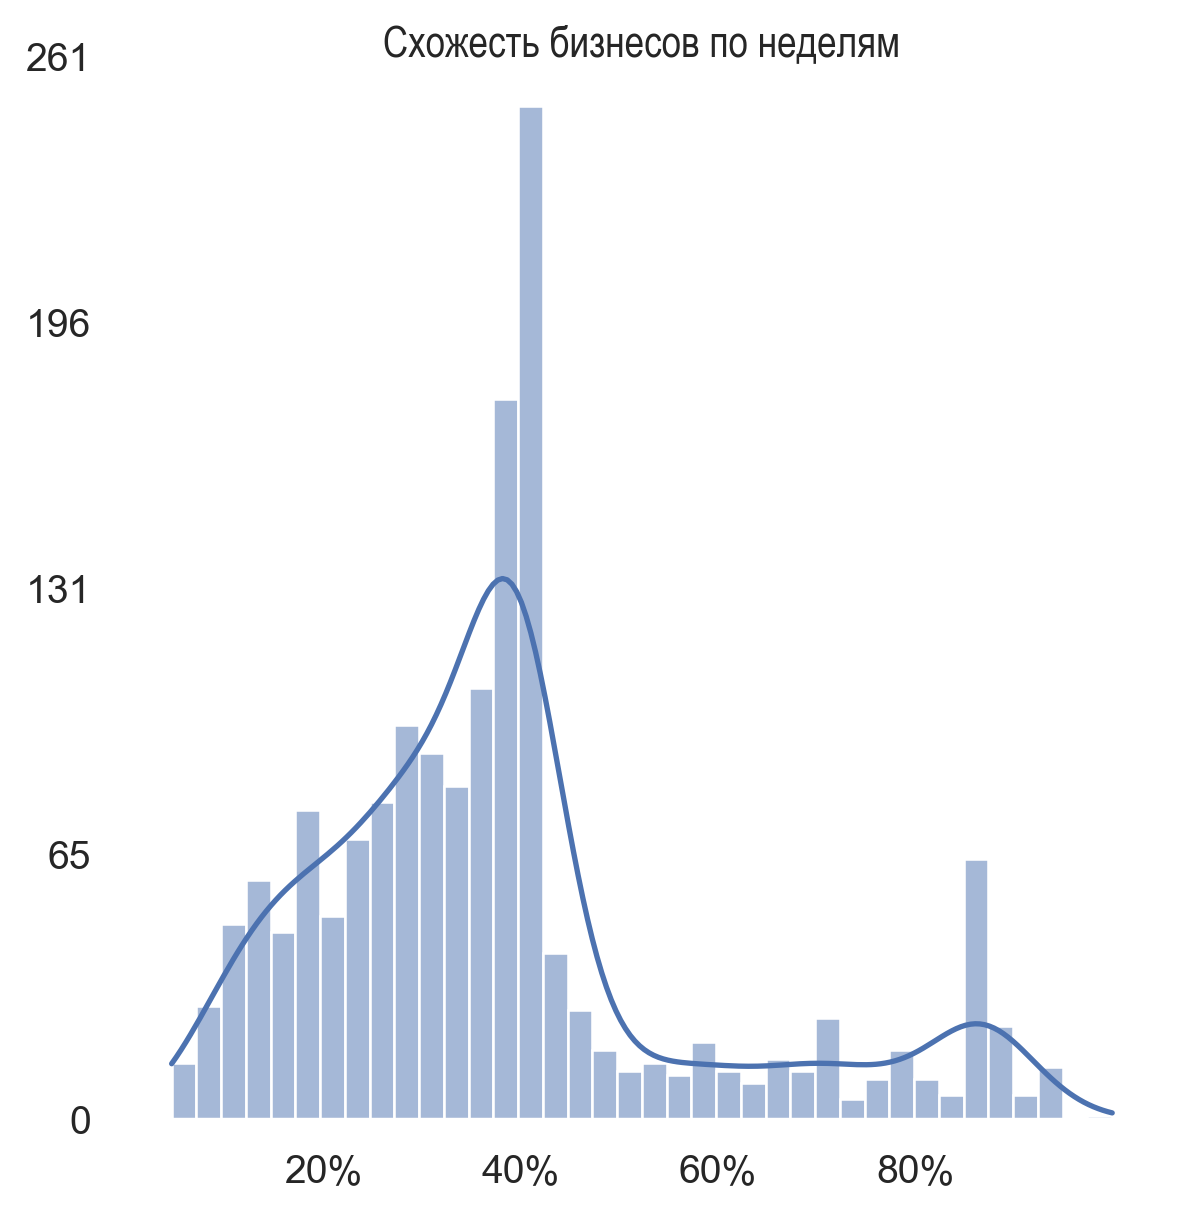

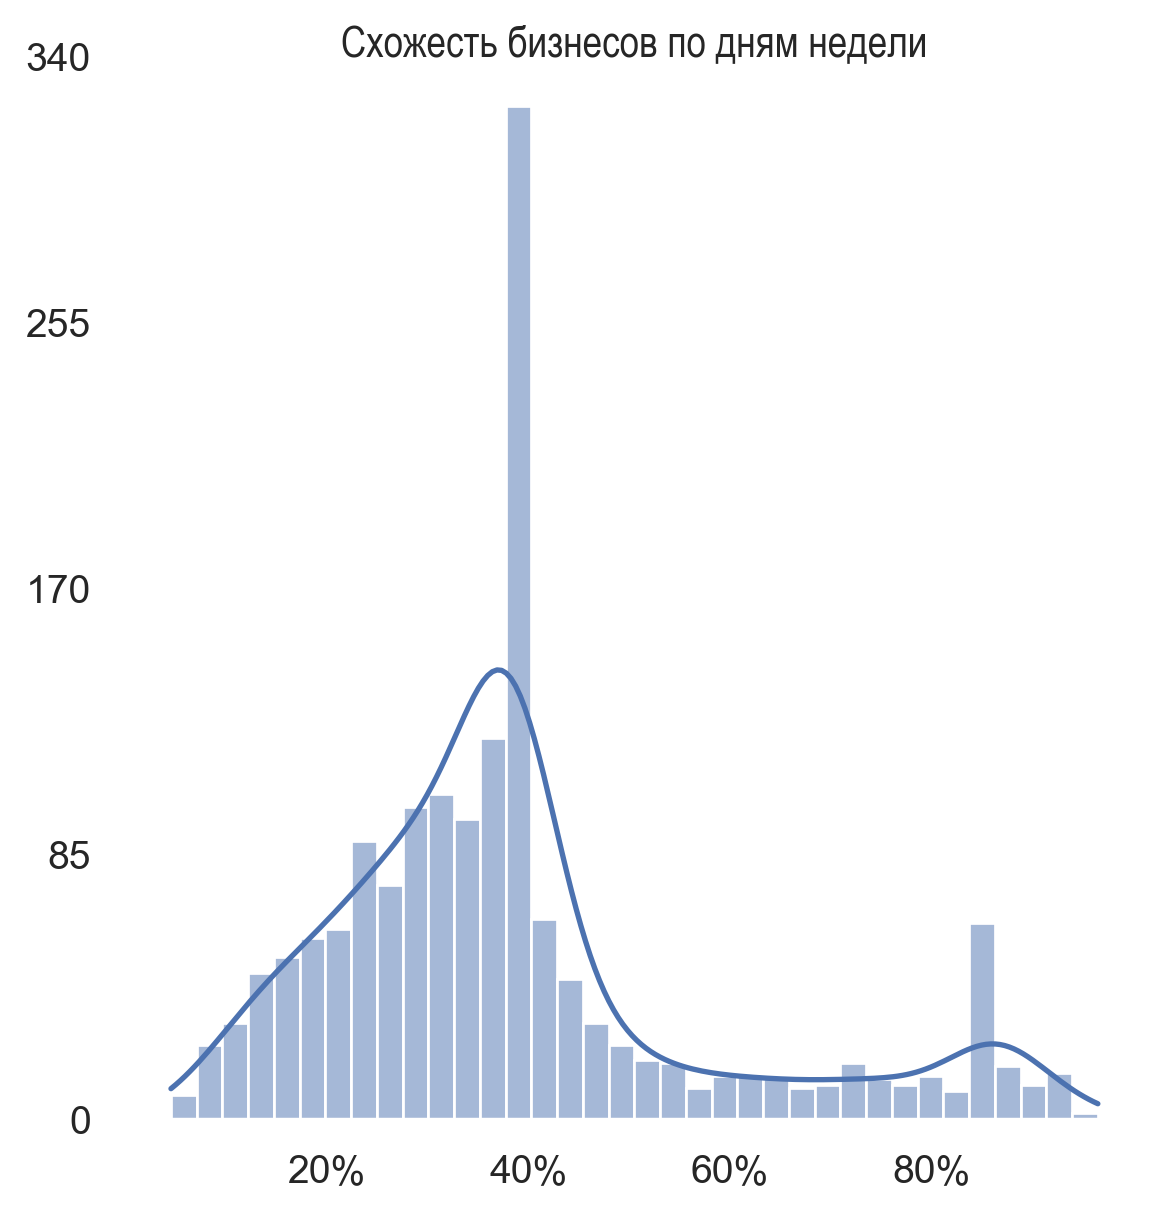

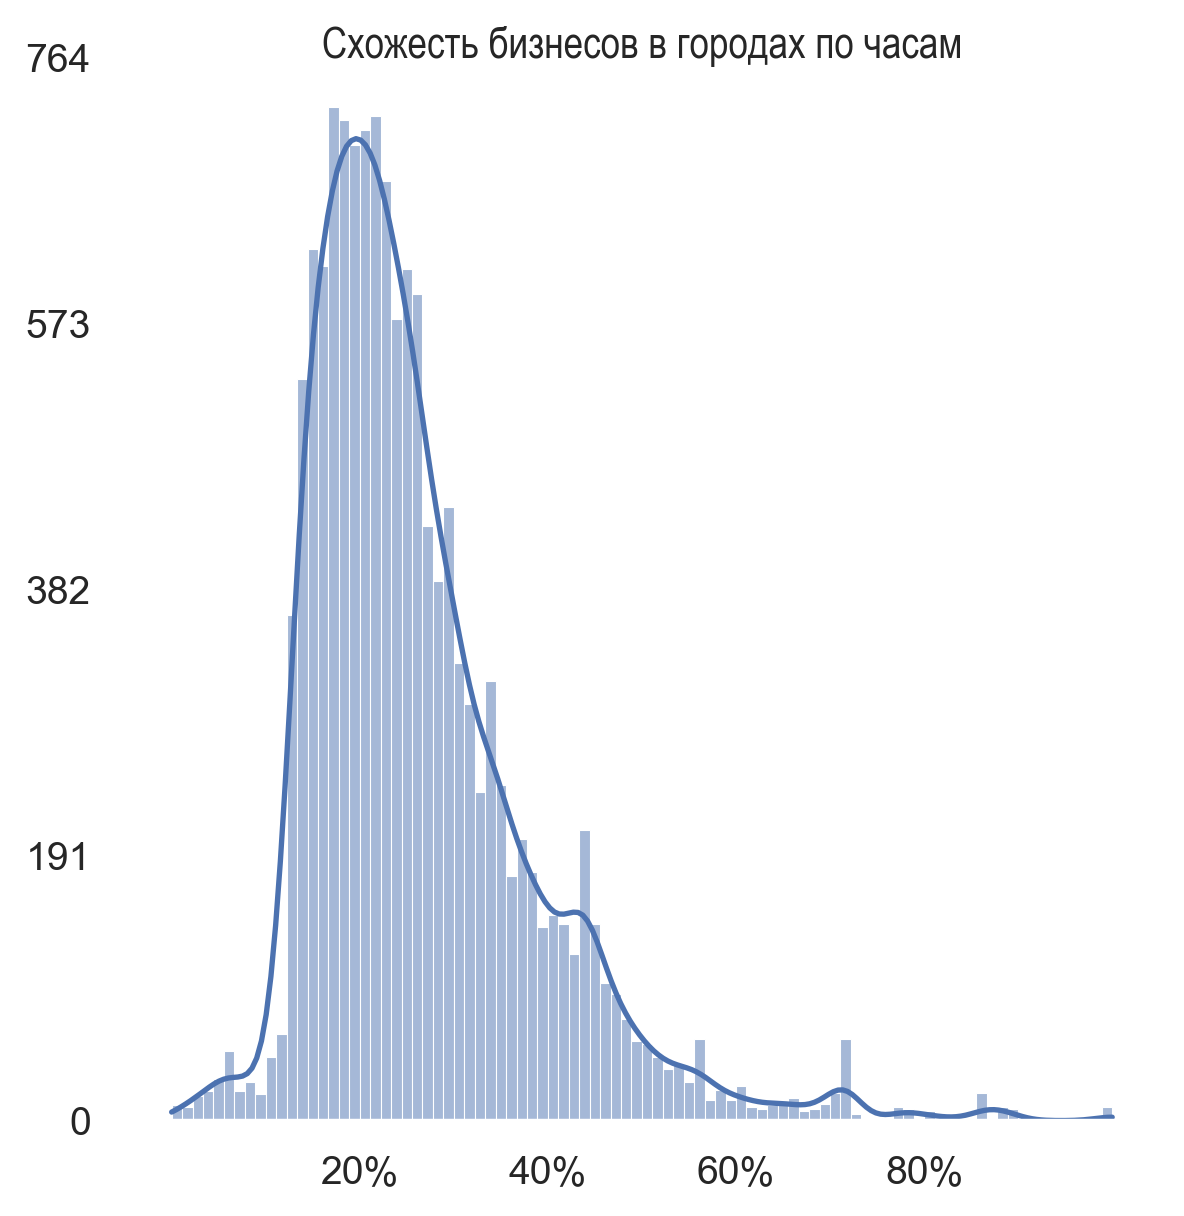

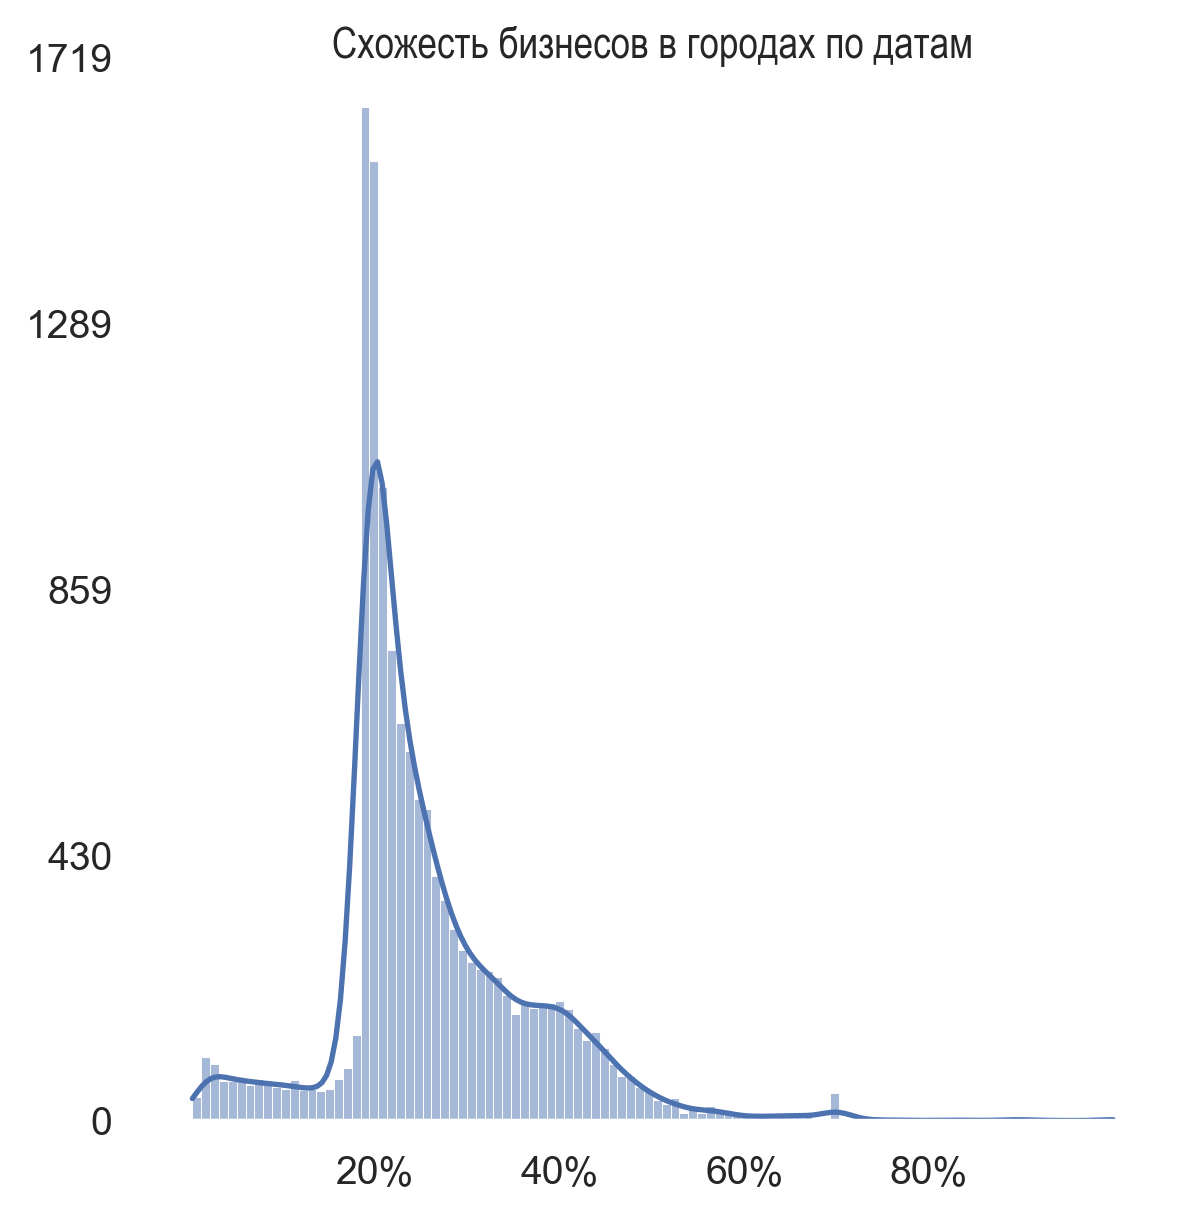

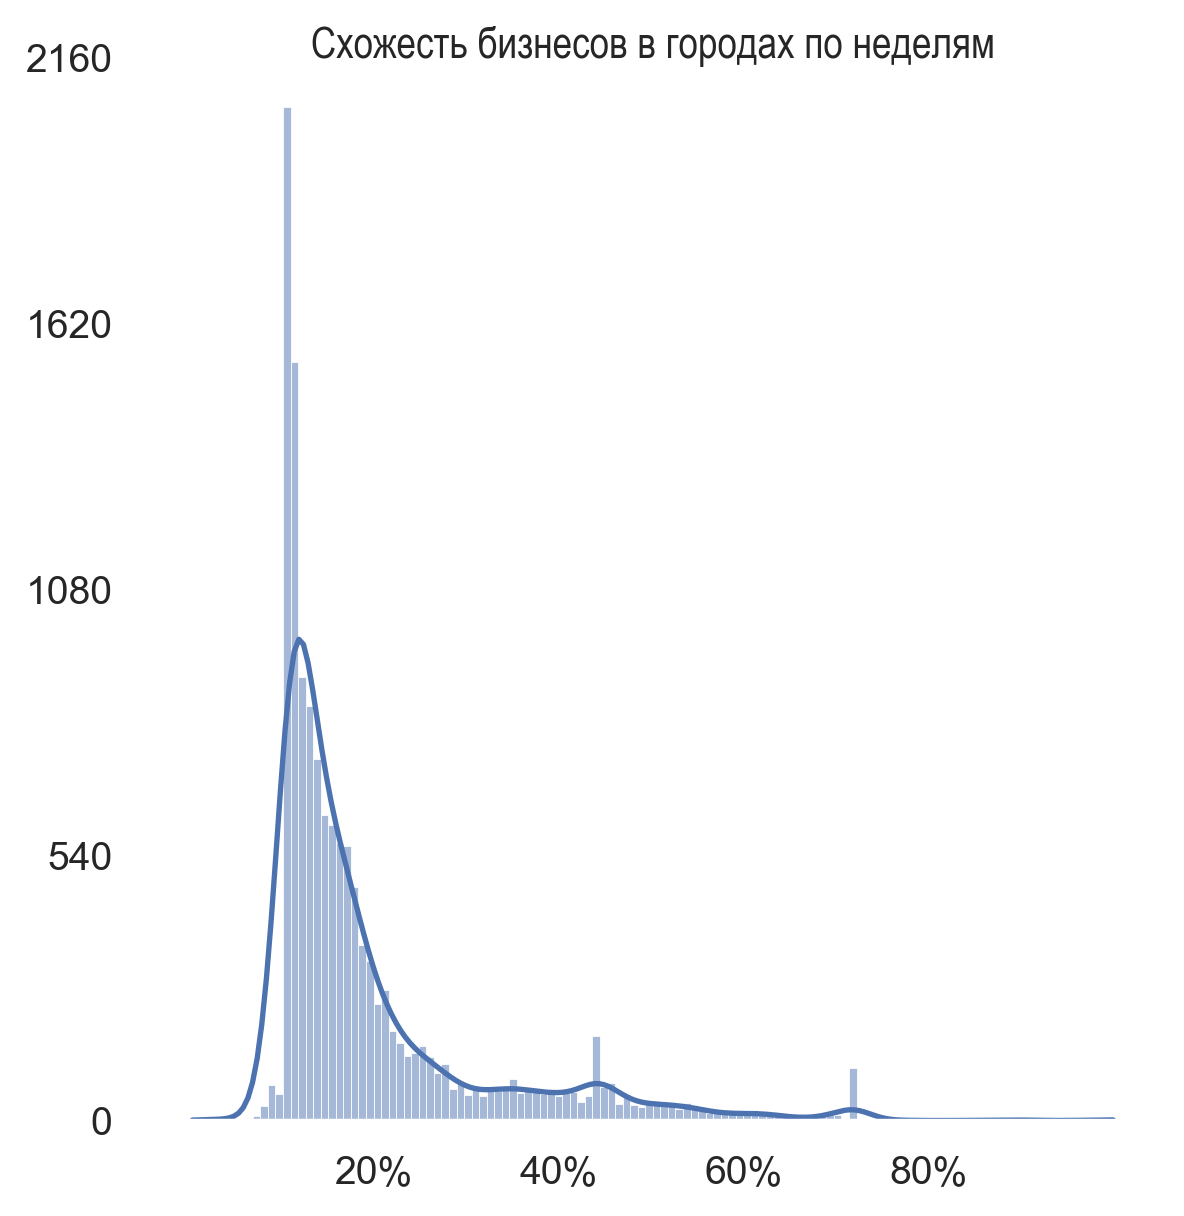

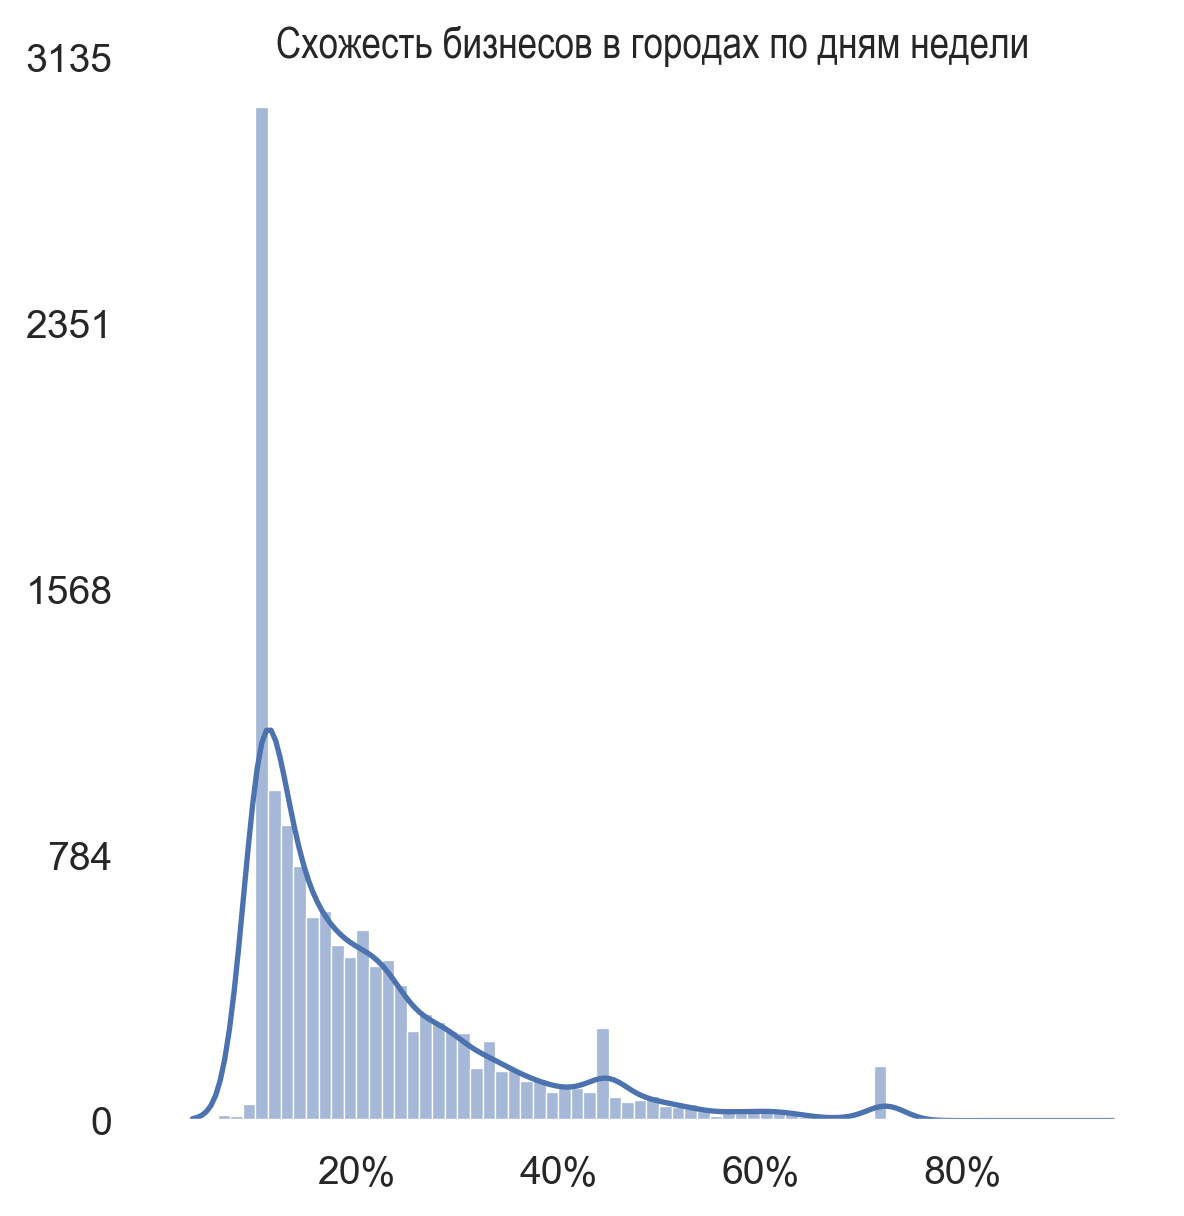

In [42]:
from matplotlib.font_manager import fontManager, FontProperties
def rounder(x,y):
    return str(round(x))

def prcnter(x,y):
    if x == 0 or x > 1:
        return ''
    return str(round(x*100)) + '%'

i = 0

for file in dates:
    for col_r in ['hour_r', 'date_r', 'week_r', 'week_day_r']:
        xr = pd.read_excel(file, sheet_name=col_r)
        xr['diff'] = xr['diff'].apply(lambda x: 1 if x > 1 else x)
        file_name = file.split('\\')[-1].replace('.xlsx','').replace('df_dates_','')
        sns_plot = sns.displot(data=xr, x="diff", kde=True)
        sns.set(rc={'figure.figsize':(6.89,4.25), "figure.dpi": 2**8})
        sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
        fpath = r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf"
        fontManager.addfont(fpath)
        prop = FontProperties(fname=fpath)
        fig = sns_plot.figure
        ax = sns_plot.ax
        ax.yaxis.set_major_formatter(FuncFormatter(rounder))
        ax.xaxis.set_major_formatter(FuncFormatter(prcnter))
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=5))
        ax.set_xlabel('')
        ax.set_ylabel('')
        one_dict = {'city':'городов','rubrics': 'бизнесов','rubrics_city':'бизнесов в городах'}
        file_name = one_dict[file_name]
        two_dict = {'hour_r': 'часам', 'date_r':'датам', 'week_r':'неделям', 'week_day_r':'дням недели'}
        col_r = two_dict[col_r]
        ax.set_title(f'Схожесть {file_name} по {col_r}'.replace('_r',''), y=0.98, font=prop.get_name())
        i+=1
        #fig.savefig(f"pictures/ten_city/displot_{i:02}.png")